In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import collections
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import pygal 
from IPython.display import SVG, HTML
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
%matplotlib inline

In [262]:
### The data frame is called house_info
raw_info = pd.read_csv("welldata1.csv")#,error_bad_lines=False)
pd.set_option('display.max_columns', None)
raw_info

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [3]:
long = raw_info["longitude"]

In [4]:
long = list(long)

In [5]:
lat = raw_info["latitude"]

In [6]:
lat = list(lat)

In [7]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
#geolocator = GoogleV3(api_key='Your_API_Key')

In [31]:
lat[9824]

-7.94296974

In [32]:
long[9824]

39.52047189

In [33]:
# Latitude & Longitude input
Latitude = "-7.94296974"
Longitude = "39.52047189"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
address = location.raw['address']
if 'state' in address:
    print(address.get('village', ''),address.get('region', ''),address.get('country', ''))
elif 'region' in address:
    print(address.get('region', ''))
#print(address.get('state', ''),address.get('neighbourhood', ''),address.get('country', ''))

In [34]:
location.raw

{'place_id': 298389660,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 195270,
 'lat': '-6.5247123',
 'lon': '35.7878438',
 'display_name': 'Tanzania',
 'address': {'country': 'Tanzania', 'country_code': 'tz'},
 'boundingbox': ['-11.761254', '-0.9854812', '29.3269773', '40.6584071']}

In [246]:
tanzania_towns1 = []

In [254]:
location = geolocator.reverse(str(9999.0)+","+str(9999.0))

ValueError: Must be a coordinate pair or Point

In [252]:
location.raw

{'place_id': 45611705,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 3815077900,
 'lat': '0',
 'lon': '0',
 'display_name': 'Soul Buoy',
 'address': {'man_made': 'Soul Buoy'},
 'boundingbox': ['-5.0E-5', '5.0E-5', '-5.0E-5', '5.0E-5']}

In [8]:
tz_z = []
for i in range(14850):
    location = geolocator.reverse(str(lat[i])+","+str(long[i]))
    if location is None :
        tz_z.append('Unkown, Tanzania')
        continue 
    address = location.raw['address']
    if 'town' in address:
        tz_z.append(address.get('town', '')+", "+'twon'+", "+address.get('region', '')
                               +", "+address.get('country', ''))
    elif 'village' in address:
        tz_z.append(address.get('village', '')+", "+'village'+", "+address.get('region', '')
                               +", "+address.get('country', ''))
    elif 'neighbourhood' in address:
        tz_z.append(address.get('neighbourhood', '')+", "+'neighbourhood'+", "+address.get('region', '')
                               +", "+address.get('country', ''))                      
    elif 'state' in address:
        tz_z.append(address.get('state', '')+", "+'state'+", "+address.get('region', '')
                               +", "+address.get('country', ''))
    elif 'region' in address:
        tz_z.append(address.get('region', '')+", "+'region'+", "+address.get('region', '')
                               +", "+address.get('country', '')) 
    else:tz_z.append(i)

In [197]:
len(tz_z)

14850

In [196]:
%store tz_z

Stored 'tz_z' (list)


In [176]:
tz_z[9824] = 'Mafia Island Marine Park, park, Southern Highlands Zone, Tanzania'

In [177]:
tz_z[9824]

'Mafia Island Marine Park, park, Southern Highlands Zone, Tanzania'

In [182]:
len(tz_z)

14850

In [190]:
place1 = []
place2 = []
place3 = []
for i in tz_z:
    no = i.count(',')
    x = i.split(',')
    if no == 3:
        place1.append(x[0])
        place2.append(x[1])
        place3.append(x[2]) 
    elif no == 4:
        place1.append(x[0]+", "+x[1])
        place2.append(x[2])
        place3.append(x[3])
    else:
        place1.append('unkown')
        place2.append('unkown')
        place3.append('unkown') 

In [192]:
place3

[' Northern Zone',
 ' Northern Zone',
 ' Central Zone',
 ' Coastal Zone',
 ' Southern Highlands Zone',
 ' Northern Zone',
 ' Southern Highlands Zone',
 ' Coastal Zone',
 ' Coastal Zone',
 ' Northern Zone',
 ' Northern Zone',
 ' Northern Zone',
 ' Central Zone',
 ' Lake Zone',
 ' Southern Highlands Zone',
 ' Southern Highlands Zone',
 ' Coastal Zone',
 ' Northern Zone',
 ' Lake Zone',
 ' Coastal Zone',
 ' Coastal Zone',
 ' Southern Highlands Zone',
 ' Western Zone',
 ' Central Zone',
 ' Lake Zone',
 ' Southern Highlands Zone',
 ' Southern Highlands Zone',
 ' Central Zone',
 'unkown',
 ' Northern Zone',
 ' Northern Zone',
 ' Central Zone',
 ' Central Zone',
 ' Northern Zone',
 ' Southern Highlands Zone',
 ' Southern Highlands Zone',
 ' Northern Zone',
 ' Northern Zone',
 ' Coastal Zone',
 ' Southern Highlands Zone',
 ' Coastal Zone',
 ' Northern Zone',
 ' Lake Zone',
 ' Lake Zone',
 ' Lake Zone',
 ' Southern Highlands Zone',
 ' Central Zone',
 ' Northern Zone',
 ' Southern Highlands Zone

In [193]:
tz_info = pd.DataFrame({'Name':place1,'Type':place2,'Zone':place3})
tz_info

,Name,Type,Zone
0,Manyara,state,Northern Zone
1,Olmotonyi Ward,village,Northern Zone
2,Puma,twon,Central Zone
3,Mkutano,village,Coastal Zone
4,Lusonga,village,Southern Highlands Zone
...,...,...,...
14845,Yombo,village,Coastal Zone
14846,Elerai,village,Northern Zone
14847,Ughandi B,village,Central Zone
14848,Magazini,village,Southern Highlands Zone


In [195]:
%store tz_info #%store -r tz_info (to open)

Stored 'tz_info' (DataFrame)


In [5]:
raw_info["amount_tsh"].value_counts()

0.0         10410
500.0         772
50.0          631
1000.0        370
20.0          349
            ...  
14000.0         1
0.2             1
70000.0         1
100000.0        1
2800.0          1
Name: amount_tsh, Length: 68, dtype: int64

In [40]:
amount_tsh = raw_info["amount_tsh"].value_counts().index.tolist()
amount_tsh

[0.0,
 500.0,
 50.0,
 1000.0,
 20.0,
 200.0,
 100.0,
 10.0,
 30.0,
 2000.0,
 250.0,
 300.0,
 5000.0,
 5.0,
 3000.0,
 25.0,
 1200.0,
 1500.0,
 600.0,
 2400.0,
 6.0,
 4000.0,
 2500.0,
 8000.0,
 6000.0,
 7.0,
 10000.0,
 450.0,
 40.0,
 3600.0,
 12000.0,
 400.0,
 750.0,
 20000.0,
 2200.0,
 4700.0,
 70.0,
 700.0,
 25000.0,
 2.0,
 15000.0,
 33.0,
 7500.0,
 30000.0,
 60.0,
 150.0,
 35000.0,
 7200.0,
 15.0,
 35.0,
 18000.0,
 6500.0,
 50000.0,
 2550.0,
 3.0,
 550.0,
 60000.0,
 0.5,
 7000.0,
 200000.0,
 350.0,
 40000.0,
 3500.0,
 14000.0,
 0.2,
 70000.0,
 100000.0,
 2800.0]

In [39]:
amount_tsh2 = raw_info["amount_tsh"].value_counts().tolist()
amount_tsh2

[10410,
 772,
 631,
 370,
 349,
 296,
 218,
 189,
 186,
 178,
 162,
 131,
 109,
 95,
 91,
 89,
 55,
 47,
 43,
 41,
 41,
 39,
 30,
 26,
 25,
 18,
 17,
 17,
 15,
 14,
 13,
 13,
 12,
 8,
 8,
 8,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [41]:
amount_tsh1 = []
for i in amount_tsh:
    i = int(i)
    amount_tsh1.append(i)
amount_tsh1

[0,
 500,
 50,
 1000,
 20,
 200,
 100,
 10,
 30,
 2000,
 250,
 300,
 5000,
 5,
 3000,
 25,
 1200,
 1500,
 600,
 2400,
 6,
 4000,
 2500,
 8000,
 6000,
 7,
 10000,
 450,
 40,
 3600,
 12000,
 400,
 750,
 20000,
 2200,
 4700,
 70,
 700,
 25000,
 2,
 15000,
 33,
 7500,
 30000,
 60,
 150,
 35000,
 7200,
 15,
 35,
 18000,
 6500,
 50000,
 2550,
 3,
 550,
 60000,
 0,
 7000,
 200000,
 350,
 40000,
 3500,
 14000,
 0,
 70000,
 100000,
 2800]

In [42]:
amount_tsh3 = raw_info["amount_tsh"]

In [49]:
qualification = []
for number in amount_tsh3:
    if  0 <= number <= 59 or  189 <= number :qualification.append('Bad Static Head: 0-59 or over 189')
    if  100 <= number <= 120:qualification.append('Good Static Head: 100-120')
    if 60 <= number <= 99 or 130 <= number <= 190:
        qualification.append('Intermediate Static Head: 60-100 or 130-190')
len(qualification)

14850

In [50]:
df = pd.DataFrame({'Amount_tsh':amount_tsh3,'Static Head':qualification})
df

,Amount_tsh,Static Head
0,0.0,Bad Static Head: 0-59 or over 189
1,0.0,Bad Static Head: 0-59 or over 189
2,0.0,Bad Static Head: 0-59 or over 189
3,0.0,Bad Static Head: 0-59 or over 189
4,500.0,Bad Static Head: 0-59 or over 189
...,...,...
14845,0.0,Bad Static Head: 0-59 or over 189
14846,1000.0,Bad Static Head: 0-59 or over 189
14847,0.0,Bad Static Head: 0-59 or over 189
14848,0.0,Bad Static Head: 0-59 or over 189


In [51]:
category = []
for i in qualification:
    if i == 'Bad Static Head: 0-59 or over 189':category.append(3)
    if i == 'Good Static Head: 100-120':category.append(1)
    if i == 'Intermediate Static Head: 60-100 or 130-190':category.append(2)
df['Category'] = category
df

,Amount_tsh,Static Head,Category
0,0.0,Bad Static Head: 0-59 or over 189,3
1,0.0,Bad Static Head: 0-59 or over 189,3
2,0.0,Bad Static Head: 0-59 or over 189,3
3,0.0,Bad Static Head: 0-59 or over 189,3
4,500.0,Bad Static Head: 0-59 or over 189,3
...,...,...,...
14845,0.0,Bad Static Head: 0-59 or over 189,3
14846,1000.0,Bad Static Head: 0-59 or over 189,3
14847,0.0,Bad Static Head: 0-59 or over 189,3
14848,0.0,Bad Static Head: 0-59 or over 189,3


In [56]:
raw_info["gps_height"].value_counts()

 0       5211
-19        18
 1343      18
 1294      18
 1283      17
         ... 
 790        1
 766        1
 750        1
 734        1
 2023       1
Name: gps_height, Length: 2157, dtype: int64

In [41]:
gps_height1 = raw_info["gps_height"].value_counts().index.tolist()
len(gps_height1)

2157

In [42]:
gps_height2 = raw_info["gps_height"].value_counts().tolist()
len(gps_height2)

2157

In [43]:
gps_height3 = []
for i in gps_height1:
    i = int(i)
    gps_height3.append(i)
len(gps_height3)

2157

In [46]:
gps_height4 = raw_info["gps_height"]

In [52]:
qualification1 = []
for number in gps_height4:
    if 1500 <= number or 2000<= number:
        qualification1.append('Bad Altitude: Over 1500 Feet')
    elif number <=-500 or number <= 0:
            qualification1.append('Good Altitude: (-500)-0 Feet')
    elif 1 <= number <= 1499:
        qualification1.append('Intermediate Altitude: 1-1499 Feet')
len(qualification1)

14850

In [53]:
df1 = pd.DataFrame({'Gps_Height':gps_height4,'Altitude':qualification1})
df1

,Gps_Height,Altitude
0,1996,Bad Altitude: Over 1500 Feet
1,1569,Bad Altitude: Over 1500 Feet
2,1567,Bad Altitude: Over 1500 Feet
3,267,Intermediate Altitude: 1-1499 Feet
4,1260,Intermediate Altitude: 1-1499 Feet
...,...,...
14845,34,Intermediate Altitude: 1-1499 Feet
14846,0,Good Altitude: (-500)-0 Feet
14847,1476,Intermediate Altitude: 1-1499 Feet
14848,998,Intermediate Altitude: 1-1499 Feet


In [39]:
df1["Altitude"].value_counts()

Intermediate Altitude: 1-1499 Feet    1441
Bad Altitude: Over 1500 Feet           663
Good Altitude:(-500)-0 Feet             53
Name: Altitude, dtype: int64

In [54]:
category1 = []
for i in qualification1:
    if i == 'Bad Altitude: Over 1500 Feet':category1.append(3)
    if i == 'Good Altitude: (-500)-0 Feet':category1.append(1)
    if i == 'Intermediate Altitude: 1-1499 Feet':category1.append(2)
df1['Category'] = category1
df1

,Gps_Height,Altitude,Category
0,1996,Bad Altitude: Over 1500 Feet,3
1,1569,Bad Altitude: Over 1500 Feet,3
2,1567,Bad Altitude: Over 1500 Feet,3
3,267,Intermediate Altitude: 1-1499 Feet,2
4,1260,Intermediate Altitude: 1-1499 Feet,2
...,...,...,...
14845,34,Intermediate Altitude: 1-1499 Feet,2
14846,0,Good Altitude: (-500)-0 Feet,1
14847,1476,Intermediate Altitude: 1-1499 Feet,2
14848,998,Intermediate Altitude: 1-1499 Feet,2


In [21]:
raw_info["water_quality"].value_counts()

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64

In [58]:
water_quality = raw_info["water_quality"].value_counts().tolist()
water_quality

[12687, 1226, 469, 201, 133, 84, 44, 6]

In [23]:
water_quality1 = raw_info["water_quality"].value_counts().index.tolist()
water_quality1

['soft',
 'salty',
 'unknown',
 'milky',
 'coloured',
 'salty abandoned',
 'fluoride',
 'fluoride abandoned']

In [24]:
raw_info["quality_group"].value_counts()

good        12687
salty        1310
unknown       469
milky         201
colored       133
fluoride       50
Name: quality_group, dtype: int64

In [59]:
Soft = []
for i in  range(water_quality[0]):
    Soft.append('Soft')
Salty = []
for i in range(water_quality[1]):
    Salty.append('Salty')
Unkown = []
for i in range(water_quality[2]):
    Unkown.append('Unkown')
Milky =[]
for i in range(water_quality[3]):
    Milky.append('Milky')
Coloured = []
for i in range(water_quality[4]):
    Coloured.append('Coloured')
Salty_abon = []
for i in range(water_quality[5]):
    Salty_abon.append('Salty Abandoned')
Flouride = []
for i in range(water_quality[6]):
    Flouride.append('Fluoride')
Flouride_abon = []
for i in range(water_quality[7]):
    Flouride_abon.append('Fluoride Abandoned')

In [60]:
amount_per_group = []
for i in Soft:
    amount_per_group.append(i)
for i in Salty:
    amount_per_group.append(i)
for i in Unkown:
    amount_per_group.append(i)
for i in Milky:
    amount_per_group.append(i)
for i in Coloured:
    amount_per_group.append(i)
for i in Salty_abon:
    amount_per_group.append(i)
for i in Flouride:
    amount_per_group.append(i)
for i in Flouride_abon:
    amount_per_group.append(i)
len(amount_per_group)

14850

In [61]:
qualification2= []
for water in amount_per_group:
    if water == 'Soft' :
        qualification2.append('Good Water')
    elif water == 'Milky':
        qualification2.append('Good Water')
    elif  water =='Fluoride':
        qualification2.append('Good Water')
    elif water == 'Salty' :
        qualification2.append('Intermediate Water')
    elif water == 'Coloured':
        qualification2.append('Intermediate Water')
    elif water == 'Salty Abandoned':
        qualification2.append('Bad Water')
    elif water == 'Fluoride Abandoned':
        qualification2.append('Bad Water')
    elif water == 'Unkown':
        qualification2.append('Unkown')
len(qualification2)

14850

In [62]:
df2 = pd.DataFrame({'Amount_Per_Group':amount_per_group,'Water Quality':qualification2})
df2

,Amount_Per_Group,Water Quality
0,Soft,Good Water
1,Soft,Good Water
2,Soft,Good Water
3,Soft,Good Water
4,Soft,Good Water
...,...,...
14845,Fluoride Abandoned,Bad Water
14846,Fluoride Abandoned,Bad Water
14847,Fluoride Abandoned,Bad Water
14848,Fluoride Abandoned,Bad Water


<AxesSubplot:xlabel='Water Quality', ylabel='count'>

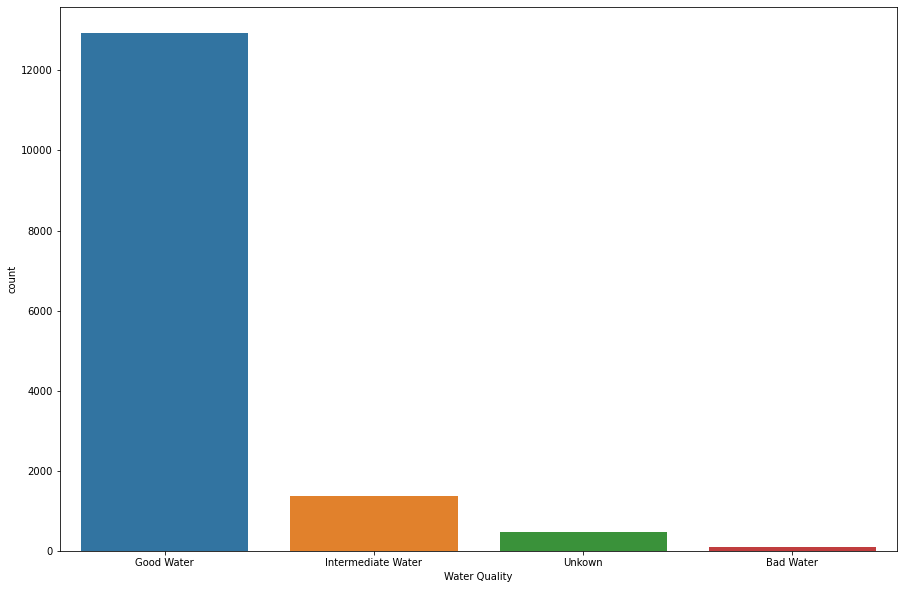

In [63]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Quality',data=df2)

In [64]:
category2 = []
for i in qualification2:
    if i == 'Bad Water':category2.append(3)
    if i == 'Good Water':category2.append(1)
    if i == 'Intermediate Water':category2.append(2)
    if i == 'Unkown':category2.append(0)   
df2['Category'] = category2
df2

,Amount_Per_Group,Water Quality,Category
0,Soft,Good Water,1
1,Soft,Good Water,1
2,Soft,Good Water,1
3,Soft,Good Water,1
4,Soft,Good Water,1
...,...,...,...
14845,Fluoride Abandoned,Bad Water,3
14846,Fluoride Abandoned,Bad Water,3
14847,Fluoride Abandoned,Bad Water,3
14848,Fluoride Abandoned,Bad Water,3


In [31]:
raw_info["quantity"].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

In [32]:
raw_info["quantity_group"].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity_group, dtype: int64

In [33]:
quantity_group = raw_info["quantity"].value_counts().index.tolist()
quantity_group

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']

In [34]:
quantity_group1 = raw_info["quantity"].value_counts().tolist()
quantity_group1

[8336, 3767, 1536, 1025, 186]

In [65]:
quantity_group2 = raw_info['quantity_group'].tolist()
quantity_group2

['seasonal',
 'insufficient',
 'insufficient',
 'dry',
 'enough',
 'enough',
 'enough',
 'dry',
 'insufficient',
 'enough',
 'enough',
 'dry',
 'dry',
 'enough',
 'enough',
 'enough',
 'enough',
 'enough',
 'seasonal',
 'dry',
 'enough',
 'insufficient',
 'enough',
 'dry',
 'enough',
 'enough',
 'dry',
 'dry',
 'enough',
 'seasonal',
 'enough',
 'enough',
 'seasonal',
 'enough',
 'enough',
 'enough',
 'insufficient',
 'enough',
 'insufficient',
 'dry',
 'enough',
 'insufficient',
 'enough',
 'dry',
 'enough',
 'dry',
 'enough',
 'insufficient',
 'enough',
 'enough',
 'enough',
 'enough',
 'insufficient',
 'insufficient',
 'unknown',
 'dry',
 'insufficient',
 'insufficient',
 'enough',
 'insufficient',
 'enough',
 'insufficient',
 'enough',
 'dry',
 'enough',
 'enough',
 'enough',
 'insufficient',
 'enough',
 'enough',
 'enough',
 'enough',
 'insufficient',
 'dry',
 'enough',
 'insufficient',
 'insufficient',
 'enough',
 'enough',
 'insufficient',
 'enough',
 'enough',
 'insufficient',


In [66]:
qualification3 = []
for water in quantity_group2:
    if water == 'enough' :
        qualification3.append('Good Quantity of Water')
    elif water == 'insufficient':
            qualification3.append('Intermediate Quantity of Water')
    elif water == 'seasonal':
        qualification3.append('Intermediate Quantity of Water')
    elif water == 'dry' :
        qualification3.append('Bad Quantity of Water')
    elif water == 'unknown':
            qualification3.append('Unknown')
qualification3

['Intermediate Quantity of Water',
 'Intermediate Quantity of Water',
 'Intermediate Quantity of Water',
 'Bad Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Bad Quantity of Water',
 'Intermediate Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Bad Quantity of Water',
 'Bad Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Intermediate Quantity of Water',
 'Bad Quantity of Water',
 'Good Quantity of Water',
 'Intermediate Quantity of Water',
 'Good Quantity of Water',
 'Bad Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Bad Quantity of Water',
 'Bad Quantity of Water',
 'Good Quantity of Water',
 'Intermediate Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',
 'Intermediate Quantity of Water',
 'Good Quantity of Water',
 'Good Quantity of Water',

In [67]:
df3 = pd.DataFrame({'Quantity_Group':quantity_group2,'Water Quantity':qualification3})
df3

,Quantity_Group,Water Quantity
0,seasonal,Intermediate Quantity of Water
1,insufficient,Intermediate Quantity of Water
2,insufficient,Intermediate Quantity of Water
3,dry,Bad Quantity of Water
4,enough,Good Quantity of Water
...,...,...
14845,enough,Good Quantity of Water
14846,insufficient,Intermediate Quantity of Water
14847,insufficient,Intermediate Quantity of Water
14848,insufficient,Intermediate Quantity of Water


<AxesSubplot:xlabel='Water Quantity', ylabel='count'>

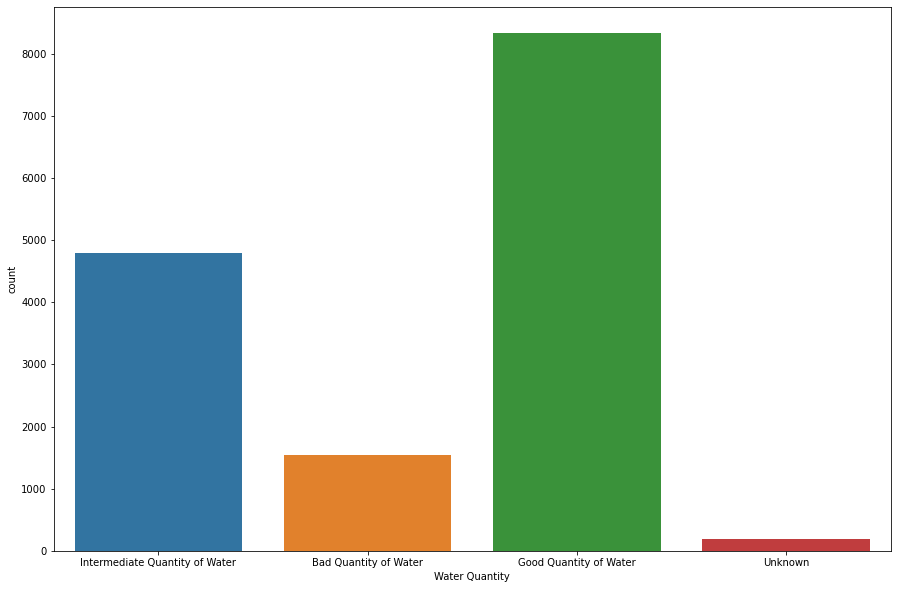

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Quantity',data=df3)

In [68]:
category3 = []
for i in qualification3:
    if i == 'Bad Quantity of Water':category3.append(3)
    if i == 'Good Quantity of Water':category3.append(1)
    if i == 'Intermediate Quantity of Water':category3.append(2)
    if i == 'Unknown':category3.append(0)   
df3['Category'] = category3
df3

,Quantity_Group,Water Quantity,Category
0,seasonal,Intermediate Quantity of Water,2
1,insufficient,Intermediate Quantity of Water,2
2,insufficient,Intermediate Quantity of Water,2
3,dry,Bad Quantity of Water,3
4,enough,Good Quantity of Water,1
...,...,...,...
14845,enough,Good Quantity of Water,1
14846,insufficient,Intermediate Quantity of Water,2
14847,insufficient,Intermediate Quantity of Water,2
14848,insufficient,Intermediate Quantity of Water,2


In [40]:
raw_info["source"].value_counts()

shallow well            4316
spring                  4195
machine dbh             2747
river                   2352
rainwater harvesting     568
hand dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: source, dtype: int64

In [69]:
sources = raw_info["source"].value_counts().index.tolist()
sources

['shallow well',
 'spring',
 'machine dbh',
 'river',
 'rainwater harvesting',
 'hand dtw',
 'lake',
 'dam',
 'other',
 'unknown']

In [70]:
sources1 = raw_info["source"].value_counts().tolist()
sources1

[4316, 4195, 2747, 2352, 568, 234, 185, 184, 49, 20]

In [71]:
sources2 = raw_info["source"].tolist()
sources2

['rainwater harvesting',
 'spring',
 'rainwater harvesting',
 'shallow well',
 'spring',
 'spring',
 'machine dbh',
 'machine dbh',
 'spring',
 'spring',
 'spring',
 'rainwater harvesting',
 'machine dbh',
 'machine dbh',
 'spring',
 'river',
 'shallow well',
 'spring',
 'rainwater harvesting',
 'machine dbh',
 'machine dbh',
 'spring',
 'shallow well',
 'machine dbh',
 'shallow well',
 'spring',
 'river',
 'machine dbh',
 'shallow well',
 'rainwater harvesting',
 'river',
 'machine dbh',
 'shallow well',
 'river',
 'river',
 'river',
 'spring',
 'spring',
 'river',
 'river',
 'machine dbh',
 'shallow well',
 'machine dbh',
 'shallow well',
 'lake',
 'river',
 'machine dbh',
 'machine dbh',
 'river',
 'dam',
 'spring',
 'spring',
 'machine dbh',
 'spring',
 'machine dbh',
 'machine dbh',
 'spring',
 'spring',
 'shallow well',
 'spring',
 'shallow well',
 'spring',
 'shallow well',
 'shallow well',
 'hand dtw',
 'shallow well',
 'spring',
 'spring',
 'shallow well',
 'spring',
 'machine

In [72]:
qualification4 = []
for source in sources2:
    if source == 'shallow well' :
        qualification4.append('Good Source')
    elif source == 'spring':
        qualification4.append('Good Source')
    elif source == 'machine dbh':
        qualification4.append('Good Source')
    elif source == 'river' :
        qualification4.append('Intermediate Source')
    elif source == 'rainwater harvesting':
         qualification4.append('Bad Source')
    elif source == 'hand dtw':
        qualification4.append('Intermediate Source')
    elif source == 'lake' or 'dam':
        qualification4.append('Bad Source')
qualification4

['Bad Source',
 'Good Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Good Source',

In [73]:
df4 = pd.DataFrame({'Sources':sources2,'Source Quality':qualification4})
df4

,Sources,Source Quality
0,rainwater harvesting,Bad Source
1,spring,Good Source
2,rainwater harvesting,Bad Source
3,shallow well,Good Source
4,spring,Good Source
...,...,...
14845,river,Intermediate Source
14846,shallow well,Good Source
14847,dam,Bad Source
14848,river,Intermediate Source


<AxesSubplot:xlabel='Source Quality', ylabel='count'>

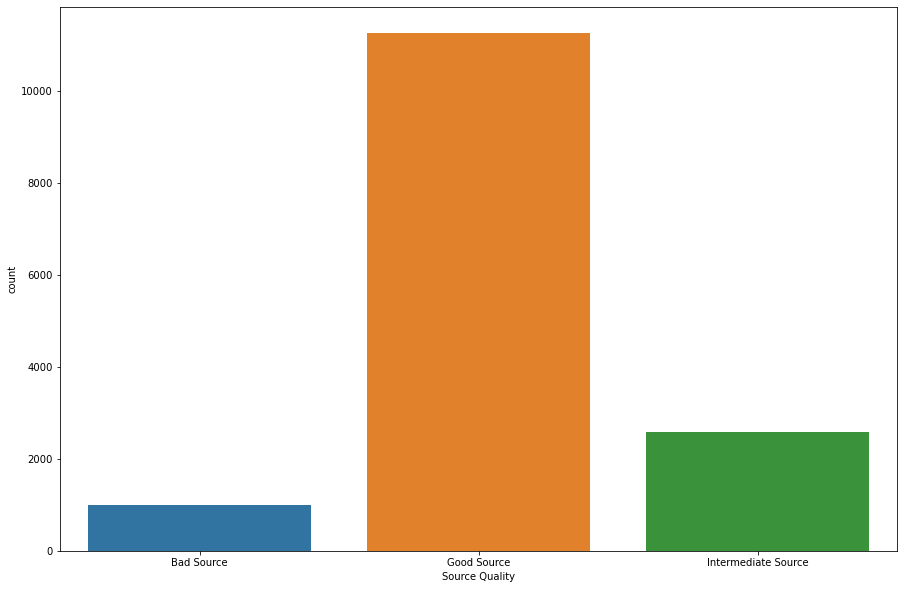

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(x='Source Quality',data=df4)

In [75]:
category4 = []
for i in qualification4:
    if i == 'Bad Source':category4.append(3)
    if i == 'Good Source':category4.append(1)
    if i == 'Intermediate Source':category4.append(2)
    if i == 'Unknown':category4.append(0)   
df4['Category'] = category4
df4

,Sources,Source Quality,Category
0,rainwater harvesting,Bad Source,3
1,spring,Good Source,1
2,rainwater harvesting,Bad Source,3
3,shallow well,Good Source,1
4,spring,Good Source,1
...,...,...,...
14845,river,Intermediate Source,2
14846,shallow well,Good Source,1
14847,dam,Bad Source,3
14848,river,Intermediate Source,2


In [48]:
raw_info["source_type"].value_counts()

shallow well            4316
spring                  4195
borehole                2981
river/lake              2537
rainwater harvesting     568
dam                      184
other                     69
Name: source_type, dtype: int64

In [49]:
raw_info["source_type"].value_counts().index.tolist()

['shallow well',
 'spring',
 'borehole',
 'river/lake',
 'rainwater harvesting',
 'dam',
 'other']

In [50]:
raw_info["source_type"].value_counts().tolist()

[4316, 4195, 2981, 2537, 568, 184, 69]

In [76]:
source_type = raw_info["source_type"].tolist()
source_type

['rainwater harvesting',
 'spring',
 'rainwater harvesting',
 'shallow well',
 'spring',
 'spring',
 'borehole',
 'borehole',
 'spring',
 'spring',
 'spring',
 'rainwater harvesting',
 'borehole',
 'borehole',
 'spring',
 'river/lake',
 'shallow well',
 'spring',
 'rainwater harvesting',
 'borehole',
 'borehole',
 'spring',
 'shallow well',
 'borehole',
 'shallow well',
 'spring',
 'river/lake',
 'borehole',
 'shallow well',
 'rainwater harvesting',
 'river/lake',
 'borehole',
 'shallow well',
 'river/lake',
 'river/lake',
 'river/lake',
 'spring',
 'spring',
 'river/lake',
 'river/lake',
 'borehole',
 'shallow well',
 'borehole',
 'shallow well',
 'river/lake',
 'river/lake',
 'borehole',
 'borehole',
 'river/lake',
 'dam',
 'spring',
 'spring',
 'borehole',
 'spring',
 'borehole',
 'borehole',
 'spring',
 'spring',
 'shallow well',
 'spring',
 'shallow well',
 'spring',
 'shallow well',
 'shallow well',
 'borehole',
 'shallow well',
 'spring',
 'spring',
 'shallow well',
 'spring',
 

In [77]:
qualification5 = []
for source in source_type:
    if source == 'shallow well' :
        qualification5.append('Good Source')
    elif source == 'spring':
        qualification5.append('Good Source')
    elif source == 'borehole':
        qualification5.append('Intermediate Source')
    elif source == 'river/lake' :
        qualification5.append('Bad Source')
    elif source == 'rainwater harvesting':
         qualification5.append('Bad Source')
    elif source == 'other':
        qualification5.append('Unknown')
    elif source == 'dam':
        qualification5.append('Bad Source')
qualification5

['Bad Source',
 'Good Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Good Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Intermediate Source',
 'Good Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Good Source',
 'Bad Source',
 'Bad Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Good Source',
 'Intermediate Source',
 'Good Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Bad Source',
 'Good Source',
 'Good Source',
 'Intermediate Source',
 'Good Source',
 'Intermediate Source',
 'Intermediate So

In [78]:
df5 = pd.DataFrame({'Source_Type':source_type,'Source Quality':qualification5})
df5

,Source_Type,Source Quality
0,rainwater harvesting,Bad Source
1,spring,Good Source
2,rainwater harvesting,Bad Source
3,shallow well,Good Source
4,spring,Good Source
...,...,...
14845,river/lake,Bad Source
14846,shallow well,Good Source
14847,dam,Bad Source
14848,river/lake,Bad Source


<AxesSubplot:xlabel='Source Quality', ylabel='count'>

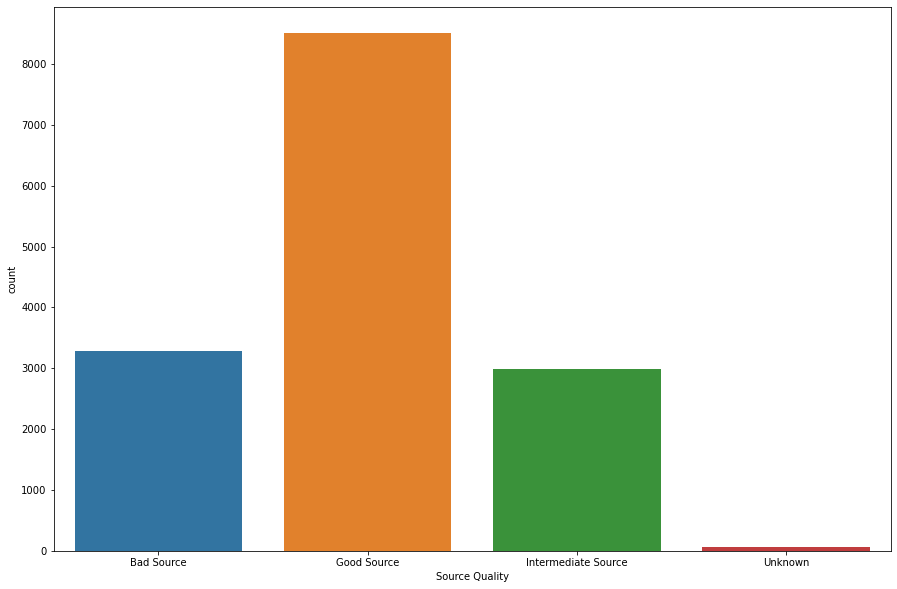

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(x='Source Quality',data=df5)

In [80]:
category5 = []
for i in qualification5:
    if i == 'Bad Source':category5.append(3)
    if i == 'Good Source':category5.append(1)
    if i == 'Intermediate Source':category5.append(2)
    if i == 'Unknown':category5.append(0)   
df5['Category'] = category5
df5

,Source_Type,Source Quality,Category
0,rainwater harvesting,Bad Source,3
1,spring,Good Source,1
2,rainwater harvesting,Bad Source,3
3,shallow well,Good Source,1
4,spring,Good Source,1
...,...,...,...
14845,river/lake,Bad Source,3
14846,shallow well,Good Source,1
14847,dam,Bad Source,3
14848,river/lake,Bad Source,3


In [56]:
raw_info["source_class"].value_counts()

groundwater    11492
surface         3289
unknown           69
Name: source_class, dtype: int64

In [81]:
source_class = raw_info["source_class"].tolist()
source_class

['surface',
 'groundwater',
 'surface',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'surface',
 'groundwater',
 'groundwater',
 'groundwater',
 'surface',
 'groundwater',
 'groundwater',
 'surface',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'surface',
 'groundwater',
 'groundwater',
 'surface',
 'surface',
 'groundwater',
 'groundwater',
 'surface',
 'surface',
 'surface',
 'groundwater',
 'groundwater',
 'surface',
 'surface',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'surface',
 'surface',
 'groundwater',
 'groundwater',
 'surface',
 'surface',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwater',
 'groundwate

In [82]:
qualification6 = []
for source in source_class:
    if source == 'groundwater' :
        qualification6.append('Intermediate Source')
    elif source == 'surface':
        qualification6.append('Bad Source')
    elif source == 'unknown':
        qualification6.append('Unknown')
qualification6

['Bad Source',
 'Intermediate Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Intermediate Source',
 'Bad Source',
 'Bad Source',
 'Intermediate Source',
 'Inter

In [83]:
df6 = pd.DataFrame({'Source_Class':source_class,'Source Class Quality':qualification6})
df6

,Source_Class,Source Class Quality
0,surface,Bad Source
1,groundwater,Intermediate Source
2,surface,Bad Source
3,groundwater,Intermediate Source
4,groundwater,Intermediate Source
...,...,...
14845,surface,Bad Source
14846,groundwater,Intermediate Source
14847,surface,Bad Source
14848,surface,Bad Source


<AxesSubplot:xlabel='Source Class Quality', ylabel='count'>

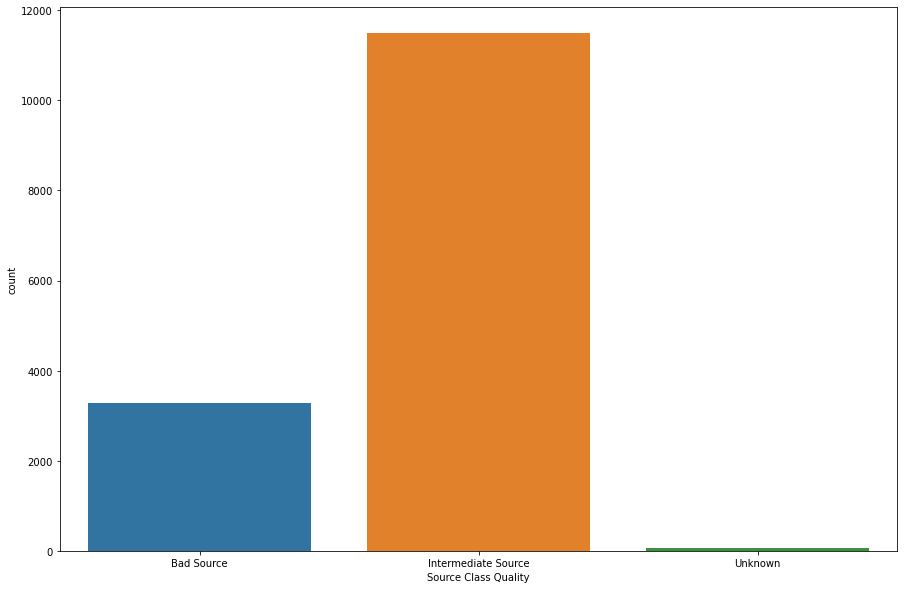

In [84]:
plt.figure(figsize=(15,10))
sns.countplot(x='Source Class Quality',data=df6)

In [85]:
category5 = []
for i in qualification5:
    if i == 'Bad Source':category5.append(3)
    if i == 'Good Source':category5.append(1)
    if i == 'Intermediate Source':category5.append(2)
    if i == 'Unknown':category5.append(0)   
df5['Category'] = category5
df5

,Source_Type,Source Quality,Category
0,rainwater harvesting,Bad Source,3
1,spring,Good Source,1
2,rainwater harvesting,Bad Source,3
3,shallow well,Good Source,1
4,spring,Good Source,1
...,...,...,...
14845,river/lake,Bad Source,3
14846,shallow well,Good Source,1
14847,dam,Bad Source,3
14848,river/lake,Bad Source,3


In [62]:
raw_info["waterpoint_type"].value_counts()

communal standpipe             7106
hand pump                      4396
other                          1630
communal standpipe multiple    1508
improved spring                 175
cattle trough                    34
dam                               1
Name: waterpoint_type, dtype: int64

In [63]:
raw_info["waterpoint_type_group"].value_counts()

communal standpipe    8614
hand pump             4396
other                 1630
improved spring        175
cattle trough           34
dam                      1
Name: waterpoint_type_group, dtype: int64

In [86]:
waterpoint_type= raw_info["waterpoint_type_group"].tolist()
waterpoint_type

['other',
 'communal standpipe',
 'other',
 'other',
 'communal standpipe',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'other',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'other',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'hand pump',
 'communal standpipe',
 'communal standpipe',
 'communal

In [87]:
qualification7 = []
for waterpoint in waterpoint_type:
    if waterpoint == 'communal standpipe' :
        qualification7.append('Good Waterpiont')
    elif waterpoint == 'hand pump':
        qualification7.append('Good Waterpiont')
    elif waterpoint == 'other':
        qualification7.append('Unknown Waterpiont')
    elif waterpoint == 'improved spring':
        qualification7.append('Good Waterpiont')
    elif waterpoint == 'cattle trough':
        qualification7.append('Intermediate Waterpiont')
    elif waterpoint == 'dam':
        qualification7.append('Bad Waterpiont')
qualification7

['Unknown Waterpiont',
 'Good Waterpiont',
 'Unknown Waterpiont',
 'Unknown Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Unknown Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Unknown Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Good Waterpiont',
 'Goo

In [88]:
df7 = pd.DataFrame({'Water_Piont_Type':waterpoint_type,'Water Piont Class':qualification7})
df7

,Water_Piont_Type,Water Piont Class
0,other,Unknown Waterpiont
1,communal standpipe,Good Waterpiont
2,other,Unknown Waterpiont
3,other,Unknown Waterpiont
4,communal standpipe,Good Waterpiont
...,...,...
14845,communal standpipe,Good Waterpiont
14846,hand pump,Good Waterpiont
14847,communal standpipe,Good Waterpiont
14848,communal standpipe,Good Waterpiont


<AxesSubplot:xlabel='Water Piont Class', ylabel='count'>

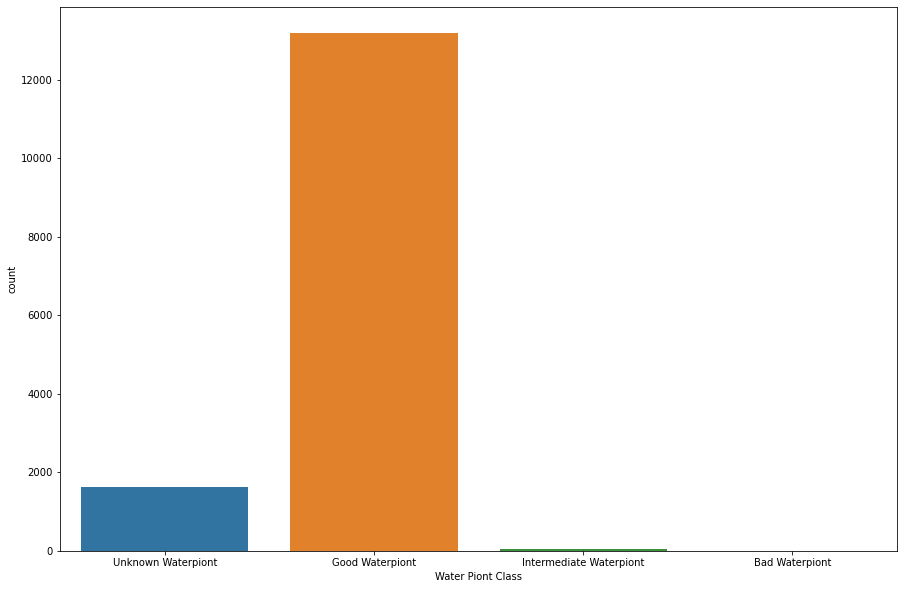

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Piont Class',data=df7)

In [89]:
category7 = []
for i in qualification7:
    if i == 'Bad Waterpiont':category7.append(3)
    if i == 'Good Waterpiont':category7.append(1)
    if i == 'Intermediate Waterpiont':category7.append(2)
    if i == 'Unknown Waterpiont':category7.append(0)   
df7['Category'] = category7
df7

,Water_Piont_Type,Water Piont Class,Category
0,other,Unknown Waterpiont,0
1,communal standpipe,Good Waterpiont,1
2,other,Unknown Waterpiont,0
3,other,Unknown Waterpiont,0
4,communal standpipe,Good Waterpiont,1
...,...,...,...
14845,communal standpipe,Good Waterpiont,1
14846,hand pump,Good Waterpiont,1
14847,communal standpipe,Good Waterpiont,1
14848,communal standpipe,Good Waterpiont,1


In [69]:
raw_info["basin"].value_counts()

Lake Victoria              2623
Pangani                    2203
Rufiji                     2011
Internal                   1857
Lake Tanganyika            1620
Wami / Ruvu                1590
Lake Nyasa                 1247
Ruvuma / Southern Coast    1094
Lake Rukwa                  605
Name: basin, dtype: int64

In [90]:
basins= raw_info["basin"].tolist()
len(basins)

14850

In [91]:
qualification8 = []
for basin in basins:
    if basin == 'Lake Tanganyika' :
        qualification8.append('Good Basin')
    elif basin == 'Lake Nyasa':
        qualification8.append('Good Basin')
    elif basin == 'Lake Victoria':
        qualification8.append('Bad Basin')
    elif basin == 'Ruvuma / Southern Coast':
        qualification8.append('Bad Basin')
    elif basin == 'Rufiji':
        qualification8.append('Bad Basin')
    elif basin == 'Lake Rukwa':
        qualification8.append('Intermediate Basin')
    elif basin == 'Pangani':
        qualification8.append('Intermediate Basin')
    elif basin == 'Wami / Ruvu':
        qualification8.append('Intermediate Basin')
    elif basin == 'Internal':
        qualification8.append('Bad Basin')
len(qualification8)

14850

In [92]:
df8 = pd.DataFrame({'Water_Basins':basins,'Basin Class':qualification8})
df8

,Water_Basins,Basin Class
0,Internal,Bad Basin
1,Pangani,Intermediate Basin
2,Internal,Bad Basin
3,Ruvuma / Southern Coast,Bad Basin
4,Ruvuma / Southern Coast,Bad Basin
...,...,...
14845,Wami / Ruvu,Intermediate Basin
14846,Pangani,Intermediate Basin
14847,Internal,Bad Basin
14848,Lake Nyasa,Good Basin


<AxesSubplot:xlabel='Basin Class', ylabel='count'>

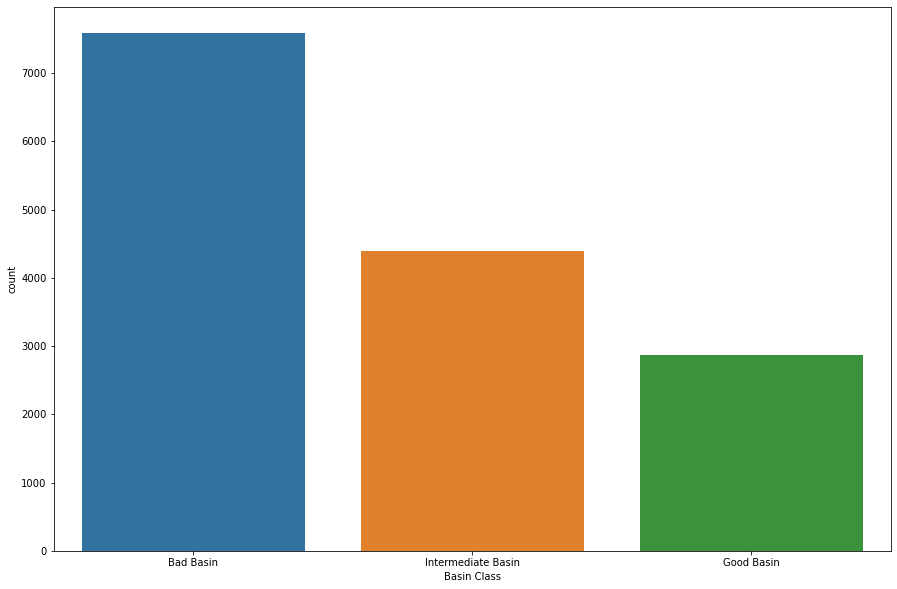

In [93]:
plt.figure(figsize=(15,10))
sns.countplot(x='Basin Class',data=df8)

In [94]:
category8 = []
for i in qualification8:
    if i == 'Bad Basin':category8.append(3)
    if i == 'Good Basin':category8.append(1)
    if i == 'Intermediate Basin':category8.append(2)
    if i == 'Unknown Basin':category8.append(0)   
df8['Category'] = category8
df8

,Water_Basins,Basin Class,Category
0,Internal,Bad Basin,3
1,Pangani,Intermediate Basin,2
2,Internal,Bad Basin,3
3,Ruvuma / Southern Coast,Bad Basin,3
4,Ruvuma / Southern Coast,Bad Basin,3
...,...,...,...
14845,Wami / Ruvu,Intermediate Basin,2
14846,Pangani,Intermediate Basin,2
14847,Internal,Bad Basin,3
14848,Lake Nyasa,Good Basin,1


In [75]:
raw_info["subvillage"].value_counts()

Shuleni      140
Majengo      129
Madukani     121
Kati          94
Sokoni        62
            ... 
Kasemu         1
Mkuzi          1
Mwabafula      1
Mkesa          1
Mayanda        1
Name: subvillage, Length: 8443, dtype: int64

In [76]:
raw_info["region_code"].value_counts()

17    1323
11    1308
12    1120
3     1115
5     1039
18     859
19     777
16     717
2      685
10     666
4      632
1      578
14     509
20     482
13     443
15     434
6      423
21     389
80     298
60     273
90     216
7      215
9      109
99      89
24      76
8       75
Name: region_code, dtype: int64

In [77]:
raw_info["district_code"].value_counts()

1     3096
2     2756
3     2523
4     2254
5     1072
6     1034
7      823
30     261
8      239
33     189
53     176
43     148
13     105
63      69
23      67
62      18
60      13
0        4
67       2
80       1
Name: district_code, dtype: int64

In [78]:
 raw_info["region"].value_counts()

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

In [95]:
region = raw_info["region"].value_counts().index.tolist()
region

['Shinyanga',
 'Iringa',
 'Mbeya',
 'Kilimanjaro',
 'Morogoro',
 'Kagera',
 'Mwanza',
 'Arusha',
 'Kigoma',
 'Pwani',
 'Ruvuma',
 'Tanga',
 'Dodoma',
 'Tabora',
 'Mara',
 'Singida',
 'Rukwa',
 'Mtwara',
 'Manyara',
 'Lindi',
 'Dar es Salaam']

In [96]:
regions= raw_info["region"].tolist()
regions

['Manyara',
 'Arusha',
 'Singida',
 'Lindi',
 'Ruvuma',
 'Arusha',
 'Iringa',
 'Mtwara',
 'Mtwara',
 'Kilimanjaro',
 'Kilimanjaro',
 'Manyara',
 'Tabora',
 'Mwanza',
 'Iringa',
 'Ruvuma',
 'Pwani',
 'Tanga',
 'Shinyanga',
 'Mtwara',
 'Dar es Salaam',
 'Iringa',
 'Kigoma',
 'Singida',
 'Shinyanga',
 'Iringa',
 'Ruvuma',
 'Dodoma',
 'Shinyanga',
 'Manyara',
 'Arusha',
 'Tabora',
 'Tabora',
 'Arusha',
 'Iringa',
 'Iringa',
 'Tanga',
 'Kilimanjaro',
 'Morogoro',
 'Mbeya',
 'Mtwara',
 'Tanga',
 'Shinyanga',
 'Mwanza',
 'Mwanza',
 'Mbeya',
 'Tabora',
 'Kilimanjaro',
 'Mbeya',
 'Shinyanga',
 'Mbeya',
 'Tanga',
 'Ruvuma',
 'Shinyanga',
 'Lindi',
 'Mwanza',
 'Mwanza',
 'Kilimanjaro',
 'Ruvuma',
 'Arusha',
 'Shinyanga',
 'Kagera',
 'Mara',
 'Singida',
 'Iringa',
 'Morogoro',
 'Arusha',
 'Kilimanjaro',
 'Mwanza',
 'Kilimanjaro',
 'Kigoma',
 'Ruvuma',
 'Mbeya',
 'Manyara',
 'Rukwa',
 'Shinyanga',
 'Tanga',
 'Kilimanjaro',
 'Dodoma',
 'Kilimanjaro',
 'Tabora',
 'Tanga',
 'Kagera',
 'Kagera',
 'Arus

In [97]:
area = []
for i in region:
    if i == 'Shinyanga':area.append(7298)       
    if i == 'Iringa':area.append(13708)           
    if i == 'Mbeya':area.append(13882)            
    if i == 'Kilimanjaro':area.append(5120)      
    if i == 'Morogoro':area.append(27268)         
    if i == 'Kagera':area.append(9755)           
    if i == 'Mwanza':area.append(3655)            
    if i == 'Arusha':area.append(14508)          
    if i == 'Kigoma':area.append(14300)            
    if i == 'Pwani':area.append(12566)            
    if i == 'Ruvuma':area.append(24583)            
    if i == 'Tanga':area.append(10296)             
    if i == 'Dodoma':area.append(15950)           
    if i == 'Tabora':area.append(29400)            
    if i ==  'Mara':area.append(8400)              
    if i == 'Singida':area.append(19050)          
    if i == 'Rukwa':area.append(8800)            
    if i == 'Mtwara':area.append(6450)            
    if i == 'Manyara':area.append(17190)           
    if i == 'Lindi':area.append(25500)             
    if i == 'Dar es Salaam':area.append(538)  
len(area)

21

In [98]:
populations = []
for i in region:
    if i == 'Shinyanga':populations.append(1534808)       
    if i == 'Iringa':populations.append(941238)           
    if i == 'Mbeya':populations.append(2707410)            
    if i == 'Kilimanjaro':populations.append(1640087)      
    if i == 'Morogoro':populations.append(2218492)         
    if i == 'Kagera':populations.append(2458023)           
    if i == 'Mwanza':populations.append(2772509)            
    if i == 'Arusha':populations.append(1694310)          
    if i == 'Kigoma':populations.append(2127930)            
    if i == 'Pwani':populations.append(1098668)            
    if i == 'Ruvuma':populations.append(1376891)            
    if i == 'Tanga':populations.append(2045205)             
    if i == 'Dodoma':populations.append(2083588)           
    if i == 'Tabora':populations.append(2291623)            
    if i ==  'Mara':populations.append(1743830)              
    if i == 'Singida':populations.append(1370637)          
    if i == 'Rukwa':populations.append(1004539)            
    if i == 'Mtwara':populations.append(1270854)            
    if i == 'Manyara':populations.append(1425131)           
    if i == 'Lindi':populations.append(864652)             
    if i == 'Dar es Salaam':populations.append(4364541)   
len(populations)

21

In [99]:
population_density = []
for x,y in enumerate(populations):population_density.append(y/area[x])   
population_density

[210.30528912030692,
 68.66340822877152,
 195.0302550064832,
 320.3294921875,
 81.35880886020243,
 251.97570476678627,
 758.5523939808481,
 116.78453267162945,
 148.8062937062937,
 87.43180009549579,
 56.00988487979498,
 198.64073426573427,
 130.63247648902822,
 77.94636054421768,
 207.59880952380954,
 71.94944881889764,
 114.1521590909091,
 197.03162790697675,
 82.90465386852821,
 33.90792156862745,
 8112.529739776952]

In [100]:
df9 = pd.DataFrame({'Regions':region,'Area':area,'Population':populations,'Population Density':population_density})
df9

,Regions,Area,Population,Population Density
0,Shinyanga,7298,1534808,210.305289
1,Iringa,13708,941238,68.663408
2,Mbeya,13882,2707410,195.030255
3,Kilimanjaro,5120,1640087,320.329492
4,Morogoro,27268,2218492,81.358809
5,Kagera,9755,2458023,251.975705
6,Mwanza,3655,2772509,758.552394
7,Arusha,14508,1694310,116.784533
8,Kigoma,14300,2127930,148.806294
9,Pwani,12566,1098668,87.431800


In [101]:
ALL_Density = []
for i in regions:
    if i == 'Shinyanga':ALL_Density.append(	210.305289)       
    if i == 'Iringa':ALL_Density.append(68.663408)           
    if i == 'Mbeya':ALL_Density.append(195.030255)            
    if i == 'Kilimanjaro':ALL_Density.append(320.329492)      
    if i == 'Morogoro':ALL_Density.append(81.358809)         
    if i == 'Kagera':ALL_Density.append(251.975705)           
    if i == 'Mwanza':ALL_Density.append(758.552394)            
    if i == 'Arusha':ALL_Density.append(116.784533)          
    if i == 'Kigoma':ALL_Density.append(148.806294)            
    if i == 'Pwani':ALL_Density.append(87.431800)            
    if i == 'Ruvuma':ALL_Density.append(56.009885)            
    if i == 'Tanga':ALL_Density.append(198.640734)             
    if i == 'Dodoma':ALL_Density.append(130.632476)           
    if i == 'Tabora':ALL_Density.append(77.946361)            
    if i ==  'Mara':ALL_Density.append(207.598810)              
    if i == 'Singida':ALL_Density.append(71.949449)          
    if i == 'Rukwa':ALL_Density.append(114.152159)            
    if i == 'Mtwara':ALL_Density.append(197.031628)            
    if i == 'Manyara':ALL_Density.append(82.904654)           
    if i == 'Lindi':ALL_Density.append(33.907922)             
    if i == 'Dar es Salaam':ALL_Density.append(8112.529740)   
ALL_Density

[82.904654,
 116.784533,
 71.949449,
 33.907922,
 56.009885,
 116.784533,
 68.663408,
 197.031628,
 197.031628,
 320.329492,
 320.329492,
 82.904654,
 77.946361,
 758.552394,
 68.663408,
 56.009885,
 87.4318,
 198.640734,
 210.305289,
 197.031628,
 8112.52974,
 68.663408,
 148.806294,
 71.949449,
 210.305289,
 68.663408,
 56.009885,
 130.632476,
 210.305289,
 82.904654,
 116.784533,
 77.946361,
 77.946361,
 116.784533,
 68.663408,
 68.663408,
 198.640734,
 320.329492,
 81.358809,
 195.030255,
 197.031628,
 198.640734,
 210.305289,
 758.552394,
 758.552394,
 195.030255,
 77.946361,
 320.329492,
 195.030255,
 210.305289,
 195.030255,
 198.640734,
 56.009885,
 210.305289,
 33.907922,
 758.552394,
 758.552394,
 320.329492,
 56.009885,
 116.784533,
 210.305289,
 251.975705,
 207.59881,
 71.949449,
 68.663408,
 81.358809,
 116.784533,
 320.329492,
 758.552394,
 320.329492,
 148.806294,
 56.009885,
 195.030255,
 82.904654,
 114.152159,
 210.305289,
 198.640734,
 320.329492,
 130.632476,
 320.

In [102]:
qualification9 = []
for density in ALL_Density:
    if 0 <= density <= 100:
        qualification9.append('Low Density')
    elif 101 <= density <= 500:
        qualification9.append('Intermediate Density')
    elif 501 <= density :
        qualification9.append('High Density')
qualification9

['Low Density',
 'Intermediate Density',
 'Low Density',
 'Low Density',
 'Low Density',
 'Intermediate Density',
 'Low Density',
 'Intermediate Density',
 'Intermediate Density',
 'Intermediate Density',
 'Intermediate Density',
 'Low Density',
 'Low Density',
 'High Density',
 'Low Density',
 'Low Density',
 'Low Density',
 'Intermediate Density',
 'Intermediate Density',
 'Intermediate Density',
 'High Density',
 'Low Density',
 'Intermediate Density',
 'Low Density',
 'Intermediate Density',
 'Low Density',
 'Low Density',
 'Intermediate Density',
 'Intermediate Density',
 'Low Density',
 'Intermediate Density',
 'Low Density',
 'Low Density',
 'Intermediate Density',
 'Low Density',
 'Low Density',
 'Intermediate Density',
 'Intermediate Density',
 'Low Density',
 'Intermediate Density',
 'Intermediate Density',
 'Intermediate Density',
 'Intermediate Density',
 'High Density',
 'High Density',
 'Intermediate Density',
 'Low Density',
 'Intermediate Density',
 'Intermediate Densit

In [103]:
df10 = pd.DataFrame({'Regions':regions,'Population Density Class':qualification9})
df10

,Regions,Population Density Class
0,Manyara,Low Density
1,Arusha,Intermediate Density
2,Singida,Low Density
3,Lindi,Low Density
4,Ruvuma,Low Density
...,...,...
14845,Pwani,Low Density
14846,Tanga,Intermediate Density
14847,Singida,Low Density
14848,Ruvuma,Low Density


<AxesSubplot:xlabel='Population Density Class', ylabel='count'>

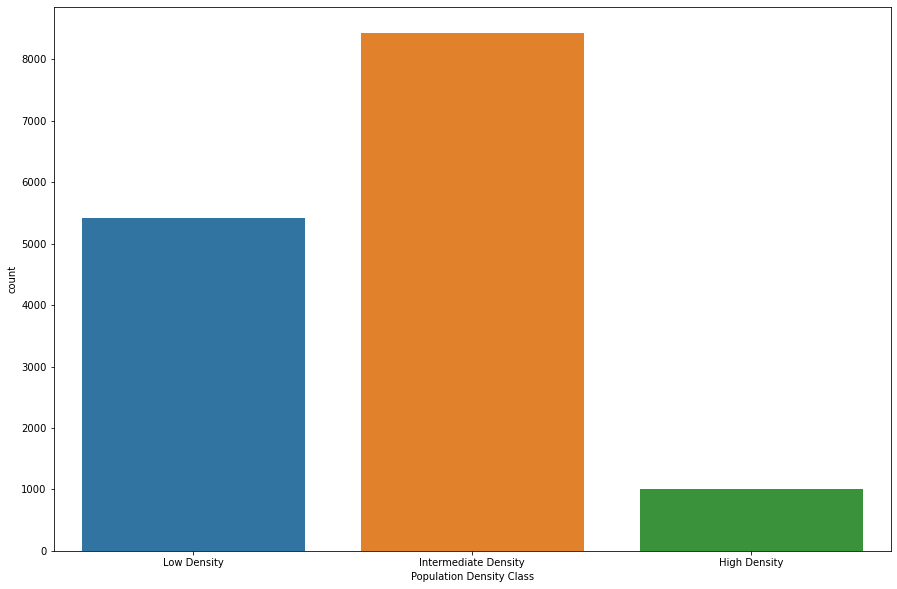

In [88]:
plt.figure(figsize=(15,10))
sns.countplot(x='Population Density Class',data=df10)

In [104]:
category9 = []
for i in qualification9:
    if i == 'Low Density':category9.append(3)
    if i == 'High Density':category9.append(1)
    if i == 'Intermediate Density':category9.append(2)  
df10['Category'] = category9
df10

,Regions,Population Density Class,Category
0,Manyara,Low Density,3
1,Arusha,Intermediate Density,2
2,Singida,Low Density,3
3,Lindi,Low Density,3
4,Ruvuma,Low Density,3
...,...,...,...
14845,Pwani,Low Density,3
14846,Tanga,Intermediate Density,2
14847,Singida,Low Density,3
14848,Ruvuma,Low Density,3


In [90]:
raw_info["extraction_type_class"].value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type_class, dtype: int64

In [105]:
extraction_type = raw_info["extraction_type_class"].value_counts().index.tolist()
extraction_type

['gravity',
 'handpump',
 'other',
 'submersible',
 'motorpump',
 'rope pump',
 'wind-powered']

In [106]:
extraction_types = raw_info["extraction_type_class"].tolist()
extraction_types

['other',
 'gravity',
 'other',
 'other',
 'gravity',
 'gravity',
 'handpump',
 'submersible',
 'gravity',
 'gravity',
 'gravity',
 'other',
 'motorpump',
 'motorpump',
 'gravity',
 'gravity',
 'handpump',
 'gravity',
 'gravity',
 'submersible',
 'submersible',
 'gravity',
 'other',
 'motorpump',
 'handpump',
 'gravity',
 'gravity',
 'motorpump',
 'handpump',
 'gravity',
 'gravity',
 'motorpump',
 'handpump',
 'gravity',
 'gravity',
 'gravity',
 'gravity',
 'gravity',
 'gravity',
 'gravity',
 'submersible',
 'handpump',
 'other',
 'handpump',
 'submersible',
 'gravity',
 'handpump',
 'submersible',
 'gravity',
 'gravity',
 'gravity',
 'gravity',
 'handpump',
 'gravity',
 'submersible',
 'other',
 'gravity',
 'gravity',
 'handpump',
 'gravity',
 'handpump',
 'gravity',
 'handpump',
 'other',
 'handpump',
 'handpump',
 'gravity',
 'gravity',
 'handpump',
 'gravity',
 'submersible',
 'gravity',
 'handpump',
 'gravity',
 'handpump',
 'gravity',
 'gravity',
 'gravity',
 'motorpump',
 'gravi

In [107]:
qualification10= []
for extraction in extraction_types:
    if extraction == 'gravity' :
        qualification10.append('Good Water Extraction')
    elif extraction == 'handpump':
        qualification10.append('Intermediate Water Basin')
    elif extraction == 'other':
        qualification10.append('Unknown')
    elif extraction == 'submersible':
        qualification10.append('Good Water Extraction')
    elif extraction == 'motorpump':
        qualification10.append('Good Water Extraction')
    elif extraction == 'rope pump':
        qualification10.append('Intermediate Water Basin')
    elif extraction == 'wind-powered':
        qualification10.append('Good Water Extraction')
len(qualification10)

14850

In [108]:
df11 = pd.DataFrame({'Extraction Type':extraction_types,'Extraction Type Class':qualification10})
df11

,Extraction Type,Extraction Type Class
0,other,Unknown
1,gravity,Good Water Extraction
2,other,Unknown
3,other,Unknown
4,gravity,Good Water Extraction
...,...,...
14845,motorpump,Good Water Extraction
14846,handpump,Intermediate Water Basin
14847,gravity,Good Water Extraction
14848,gravity,Good Water Extraction


<AxesSubplot:xlabel='Extraction Type Class', ylabel='count'>

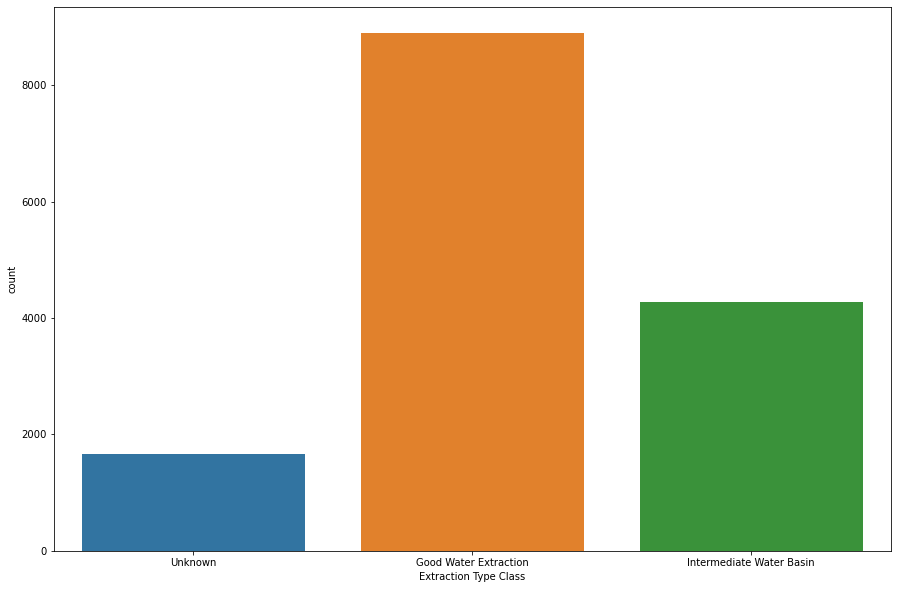

In [109]:
plt.figure(figsize=(15,10))
sns.countplot(x='Extraction Type Class',data=df11)

In [111]:
category10 = []
for i in qualification10:
    if i == 'Intermediate Water Basin':category10.append(2)
    if i == 'Good Water Extraction':category10.append(1)
    if i == 'Unknown':category10.append(0)  
df11['Category'] = category10
df11

,Extraction Type,Extraction Type Class,Category
0,other,Unknown,0
1,gravity,Good Water Extraction,1
2,other,Unknown,0
3,other,Unknown,0
4,gravity,Good Water Extraction,1
...,...,...,...
14845,motorpump,Good Water Extraction,1
14846,handpump,Intermediate Water Basin,2
14847,gravity,Good Water Extraction,1
14848,gravity,Good Water Extraction,1


In [97]:
raw_info["management_group"].value_counts()

user-group    13048
commercial      953
parastatal      461
other           266
unknown         122
Name: management_group, dtype: int64

In [112]:
management_group = raw_info["management_group"].tolist()
management_group

['parastatal',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'parastatal',
 'user-group',
 'other',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'commercial',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',
 'user-group',


In [113]:
qualification11= []
for management in management_group:
    if management == 'user-group' :
        qualification11.append('Good Management')
    elif management == 'commercial':
        qualification11.append('Intermediate Management')
    elif management == 'parastatal':
        qualification11.append('Bad Management')
    elif management == 'other':
        qualification11.append('Bad Management')
    elif management == 'unknown':
        qualification11.append('Unknown')
len(qualification11)

14850

In [114]:
df12 = pd.DataFrame({'Management Type':management_group,'Management Type Class':qualification11})
df12

,Management Type,Management Type Class
0,parastatal,Bad Management
1,user-group,Good Management
2,user-group,Good Management
3,user-group,Good Management
4,user-group,Good Management
...,...,...
14845,user-group,Good Management
14846,user-group,Good Management
14847,user-group,Good Management
14848,user-group,Good Management


<AxesSubplot:xlabel='Management Type Class', ylabel='count'>

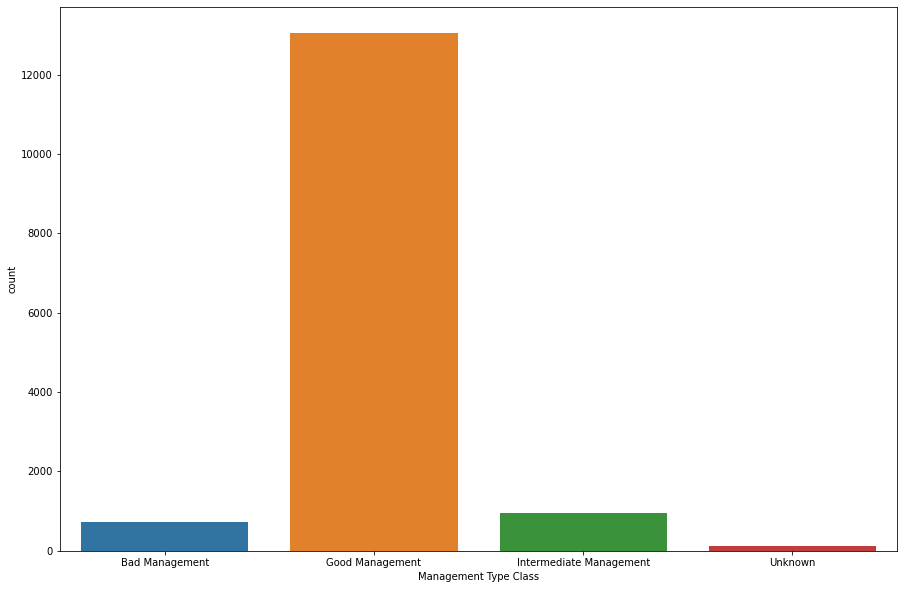

In [101]:
plt.figure(figsize=(15,10))
sns.countplot(x='Management Type Class',data=df12)

In [115]:
category11 = []
for i in qualification11:
    if i == 'Intermediate Management':category11.append(2)
    elif i == 'Bad Management':category11.append(3)
    elif i == 'Good Management':category11.append(1)
    elif i == 'Unknown':category11.append(0)  
df12['Category'] = category11
df12

,Management Type,Management Type Class,Category
0,parastatal,Bad Management,3
1,user-group,Good Management,1
2,user-group,Good Management,1
3,user-group,Good Management,1
4,user-group,Good Management,1
...,...,...,...
14845,user-group,Good Management,1
14846,user-group,Good Management,1
14847,user-group,Good Management,1
14848,user-group,Good Management,1


In [103]:
raw_info["construction_year"].value_counts()

0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1960      22
1963      22
1967      18
1969      18
1968      16
1964       8
1961       7
1962       6
1966       2
1965       2
Name: construction_year, dtype: int64

In [116]:
construction_year = raw_info["construction_year"].tolist()
construction_year

[2012,
 2000,
 2010,
 1987,
 2000,
 1990,
 2007,
 1982,
 1997,
 2003,
 2006,
 2002,
 0,
 0,
 1984,
 1989,
 0,
 1978,
 0,
 1982,
 2010,
 2008,
 2005,
 1970,
 0,
 2008,
 2009,
 0,
 0,
 2002,
 2002,
 0,
 0,
 1998,
 1978,
 1978,
 1971,
 1972,
 1984,
 0,
 2006,
 1983,
 0,
 0,
 0,
 0,
 0,
 2007,
 0,
 0,
 0,
 1974,
 1992,
 0,
 2002,
 0,
 1999,
 1970,
 1990,
 2004,
 0,
 0,
 2011,
 1990,
 0,
 2010,
 1988,
 1962,
 0,
 2008,
 1978,
 1986,
 0,
 2008,
 1985,
 0,
 2009,
 2008,
 0,
 1972,
 0,
 1969,
 0,
 0,
 2007,
 0,
 0,
 0,
 0,
 2012,
 2010,
 2008,
 1998,
 1972,
 1996,
 0,
 1974,
 1986,
 2006,
 0,
 1978,
 0,
 0,
 2004,
 2011,
 0,
 2009,
 1999,
 1971,
 0,
 1994,
 0,
 2010,
 1982,
 2000,
 0,
 1984,
 1998,
 2000,
 0,
 0,
 2004,
 1972,
 0,
 2010,
 1984,
 1984,
 2007,
 0,
 2002,
 2002,
 2002,
 0,
 1972,
 2010,
 1998,
 0,
 2005,
 2010,
 0,
 1983,
 0,
 1996,
 0,
 2000,
 1999,
 0,
 0,
 1990,
 1986,
 0,
 0,
 0,
 1999,
 0,
 1992,
 2007,
 0,
 2009,
 0,
 2007,
 2010,
 1960,
 1982,
 2011,
 0,
 2000,
 0,
 0,
 20

In [117]:
qualification12= []
for construction in construction_year:
    if 2001 <= construction <= 2021 :
        qualification12.append('Good Construction Year')
    elif 1991 <= construction <= 2002 :
        qualification12.append('Intermediate Construction Year')
    elif  construction == 0 :
        qualification12.append('Unkown Year')
    elif   construction <= 1991  :
        qualification12.append('Bad Construction Year')
qualification12

['Good Construction Year',
 'Intermediate Construction Year',
 'Good Construction Year',
 'Bad Construction Year',
 'Intermediate Construction Year',
 'Bad Construction Year',
 'Good Construction Year',
 'Bad Construction Year',
 'Intermediate Construction Year',
 'Good Construction Year',
 'Good Construction Year',
 'Good Construction Year',
 'Unkown Year',
 'Unkown Year',
 'Bad Construction Year',
 'Bad Construction Year',
 'Unkown Year',
 'Bad Construction Year',
 'Unkown Year',
 'Bad Construction Year',
 'Good Construction Year',
 'Good Construction Year',
 'Good Construction Year',
 'Bad Construction Year',
 'Unkown Year',
 'Good Construction Year',
 'Good Construction Year',
 'Unkown Year',
 'Unkown Year',
 'Good Construction Year',
 'Good Construction Year',
 'Unkown Year',
 'Unkown Year',
 'Intermediate Construction Year',
 'Bad Construction Year',
 'Bad Construction Year',
 'Bad Construction Year',
 'Bad Construction Year',
 'Bad Construction Year',
 'Unkown Year',
 'Good Cons

In [118]:
df13 = pd.DataFrame({'Construction Year':construction_year,'Construction Year Class':qualification12})
df13

,Construction Year,Construction Year Class
0,2012,Good Construction Year
1,2000,Intermediate Construction Year
2,2010,Good Construction Year
3,1987,Bad Construction Year
4,2000,Intermediate Construction Year
...,...,...
14845,1988,Bad Construction Year
14846,1994,Intermediate Construction Year
14847,2010,Good Construction Year
14848,2009,Good Construction Year


<AxesSubplot:xlabel='Construction Year Class', ylabel='count'>

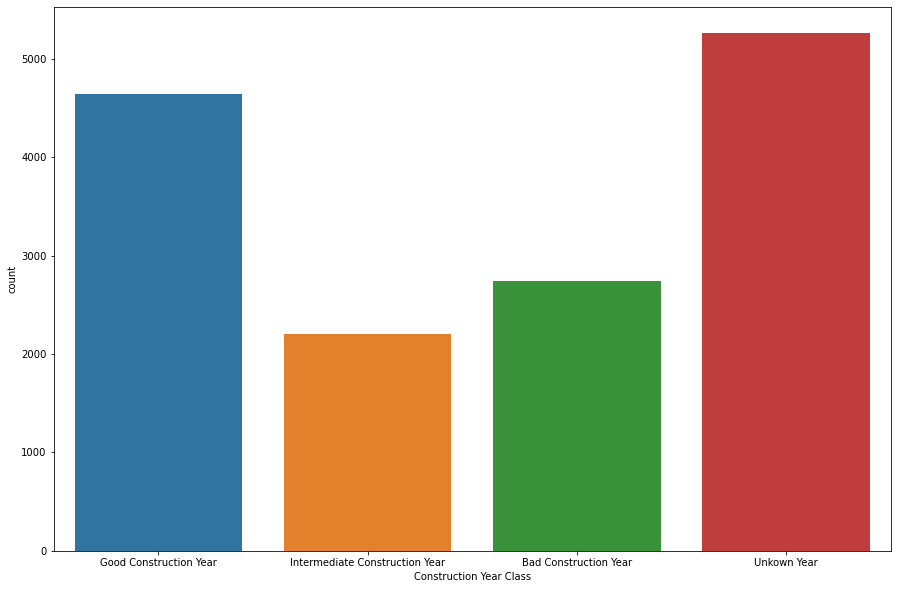

In [119]:
plt.figure(figsize=(15,10))
sns.countplot(x='Construction Year Class',data=df13)

In [120]:
category12 = []
for i in qualification12:
    if i == 'Intermediate Construction Year':category12.append(2)
    elif i == 'Bad Construction Year':category12.append(3)
    elif i == 'Good Construction Year':category12.append(1)
    elif i == 'Unkown Year':category12.append(0)  
df13['Category'] = category12
df13

,Construction Year,Construction Year Class,Category
0,2012,Good Construction Year,1
1,2000,Intermediate Construction Year,2
2,2010,Good Construction Year,1
3,1987,Bad Construction Year,3
4,2000,Intermediate Construction Year,2
...,...,...,...
14845,1988,Bad Construction Year,3
14846,1994,Intermediate Construction Year,2
14847,2010,Good Construction Year,1
14848,2009,Good Construction Year,1


In [109]:
raw_info["permit"].value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [121]:
permits = raw_info["permit"].tolist()
permits

[True,
 True,
 nan,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 nan,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 nan,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 nan,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 nan,
 True,
 True,
 False,
 True,
 True,
 nan,
 True,
 False,
 nan,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,


In [122]:
qualification13= []
for permit in permits:
    if permit == True :
        qualification13.append('Good')
    elif permit == False :
        qualification13.append('Bad')
    else:
        qualification13.append('Unkown')
qualification13

['Good',
 'Good',
 'Unkown',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Unkown',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Unkown',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Unkown',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Unkown',
 'Good',
 'Good',
 'Bad',
 'Good'

In [123]:
df14 = pd.DataFrame({'Permit':permits,'Permit Class':qualification13})
df14

,Permit,Permit Class
0,True,Good
1,True,Good
2,NaN,Unkown
3,True,Good
4,True,Good
...,...,...
14845,True,Good
14846,False,Bad
14847,NaN,Unkown
14848,True,Good


<AxesSubplot:xlabel='Permit Class', ylabel='count'>

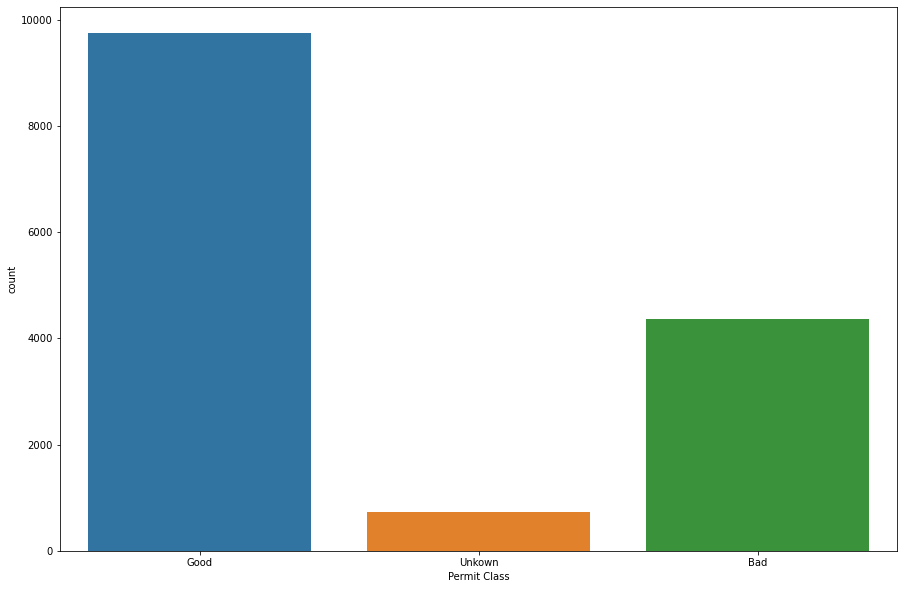

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(x='Permit Class',data=df14)

In [124]:
category13 = []
for i in qualification13:
    if i == 'Bad':category13.append(3)
    elif i == 'Good':category13.append(1)
    elif i == 'Unkown':category13.append(0) 
df14['Category'] = category13
df14

,Permit,Permit Class,Category
0,True,Good,1
1,True,Good,1
2,NaN,Unkown,0
3,True,Good,1
4,True,Good,1
...,...,...,...
14845,True,Good,1
14846,False,Bad,3
14847,NaN,Unkown,0
14848,True,Good,1


In [115]:
raw_info["payment"].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [125]:
payment_type = raw_info["payment"].tolist()
payment_type

['never pay',
 'never pay',
 'never pay',
 'unknown',
 'pay monthly',
 'never pay',
 'never pay',
 'never pay',
 'pay per bucket',
 'pay monthly',
 'pay per bucket',
 'never pay',
 'unknown',
 'pay per bucket',
 'pay monthly',
 'pay annually',
 'never pay',
 'pay monthly',
 'unknown',
 'never pay',
 'never pay',
 'never pay',
 'unknown',
 'unknown',
 'never pay',
 'pay monthly',
 'never pay',
 'pay per bucket',
 'pay when scheme fails',
 'never pay',
 'pay per bucket',
 'never pay',
 'never pay',
 'pay per bucket',
 'pay monthly',
 'pay monthly',
 'never pay',
 'pay monthly',
 'never pay',
 'pay when scheme fails',
 'pay per bucket',
 'never pay',
 'never pay',
 'never pay',
 'pay per bucket',
 'pay when scheme fails',
 'pay when scheme fails',
 'pay per bucket',
 'pay when scheme fails',
 'pay monthly',
 'never pay',
 'never pay',
 'pay monthly',
 'pay per bucket',
 'unknown',
 'unknown',
 'never pay',
 'never pay',
 'pay when scheme fails',
 'never pay',
 'other',
 'never pay',
 'pay

In [126]:
qualification14= []
for payments in payment_type:
    if payments  == 'pay per bucket' or payments  == 'pay monthly' or payments  == 'pay annually'or payments  == 'pay when scheme fails' :
        qualification14.append('Good Water Quality')
    elif payments == 'unknown' :
        qualification14.append('Unkown')
    elif  payments  == 'never pay' or payments  == 'other' :
        qualification14.append('Bad Water Quality')
qualification14

['Bad Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Unkown',
 'Good Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Unkown',
 'Good Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Unkown',
 'Bad Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Unkown',
 'Unkown',
 'Bad Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Bad Water Quality',
 'Good Water Quality',
 'Good Water Quality',
 'Good Water Quality',


In [127]:
df15 = pd.DataFrame({'Payment Type':payment_type,'Water Quality Class':qualification14})
df15

,Payment Type,Water Quality Class
0,never pay,Bad Water Quality
1,never pay,Bad Water Quality
2,never pay,Bad Water Quality
3,unknown,Unkown
4,pay monthly,Good Water Quality
...,...,...
14845,never pay,Bad Water Quality
14846,pay annually,Good Water Quality
14847,never pay,Bad Water Quality
14848,never pay,Bad Water Quality


<AxesSubplot:xlabel='Water Quality Class', ylabel='count'>

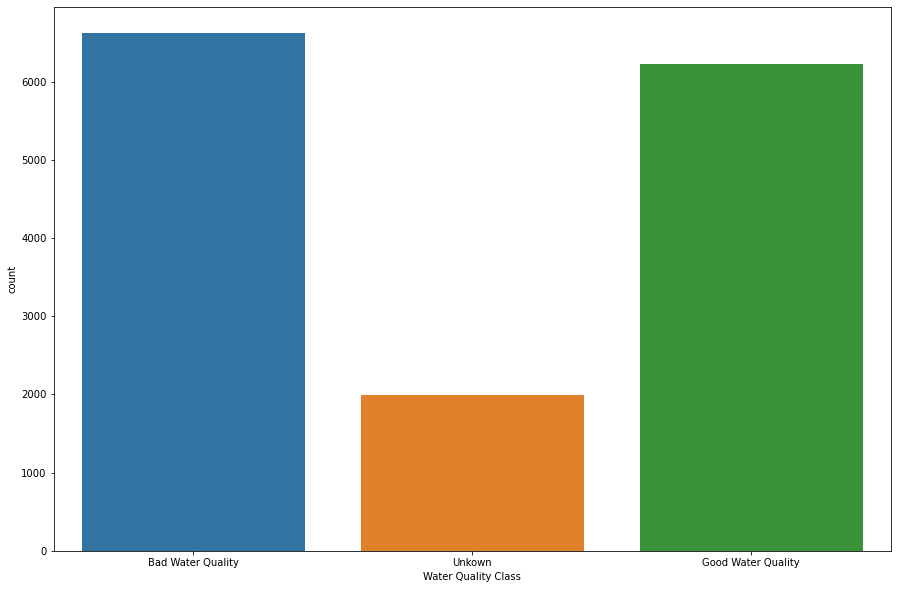

In [119]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water Quality Class',data=df15)

In [128]:
category14 = []
for i in qualification14:
    if i == 'Bad Water Quality':category14.append(3)
    elif i == 'Good Water Quality':category14.append(1)
    elif i == 'Unkown':category14.append(0) 
df15['Category'] = category14
df15

,Payment Type,Water Quality Class,Category
0,never pay,Bad Water Quality,3
1,never pay,Bad Water Quality,3
2,never pay,Bad Water Quality,3
3,unknown,Unkown,0
4,pay monthly,Good Water Quality,1
...,...,...,...
14845,never pay,Bad Water Quality,3
14846,pay annually,Good Water Quality,1
14847,never pay,Bad Water Quality,3
14848,never pay,Bad Water Quality,3


In [121]:
raw_info["population"].value_counts()

0       5453
1       1757
150      436
200      430
250      406
        ... 
2530       1
467        1
451        1
4521       1
1735       1
Name: population, Length: 637, dtype: int64

In [129]:
populations = raw_info["population"].tolist()
populations

[321,
 300,
 500,
 250,
 60,
 200,
 600,
 1,
 40,
 1,
 75,
 500,
 0,
 0,
 1,
 0,
 900,
 1,
 0,
 300,
 120,
 30,
 1750,
 1,
 0,
 50,
 0,
 0,
 0,
 860,
 200,
 0,
 0,
 300,
 360,
 45,
 200,
 45,
 1,
 0,
 400,
 120,
 0,
 0,
 0,
 0,
 0,
 180,
 0,
 0,
 0,
 1,
 1,
 0,
 530,
 0,
 1200,
 1,
 250,
 200,
 0,
 0,
 560,
 1,
 0,
 230,
 150,
 1,
 0,
 1,
 950,
 1,
 0,
 221,
 50,
 0,
 25,
 125,
 0,
 80,
 0,
 1,
 0,
 0,
 98,
 0,
 0,
 0,
 300,
 320,
 1,
 1,
 72,
 70,
 350,
 0,
 0,
 0,
 20,
 0,
 50,
 0,
 0,
 60,
 390,
 0,
 40,
 650,
 1,
 0,
 192,
 0,
 250,
 1,
 200,
 0,
 0,
 200,
 25,
 0,
 0,
 250,
 70,
 0,
 150,
 60,
 0,
 20,
 0,
 80,
 260,
 0,
 0,
 200,
 250,
 250,
 0,
 189,
 1,
 0,
 180,
 0,
 850,
 0,
 1,
 50,
 0,
 0,
 350,
 100,
 0,
 0,
 0,
 300,
 0,
 96,
 740,
 0,
 400,
 0,
 1,
 250,
 1,
 300,
 500,
 0,
 200,
 0,
 0,
 1,
 30,
 0,
 150,
 0,
 0,
 0,
 0,
 590,
 16,
 50,
 300,
 80,
 1,
 630,
 210,
 0,
 0,
 150,
 250,
 320,
 1,
 120,
 0,
 65,
 218,
 0,
 700,
 80,
 40,
 120,
 1,
 1,
 23,
 1,
 0,
 1,
 380,


In [130]:
qualification15= []
for population in populations:
    if 0 <= population <= 2000:
        qualification15.append('Good Water well')
    elif 2001 <= population   :
        qualification15.append('Bad Water well')
qualification15

['Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',
 'Good Water well',


In [131]:
df16 = pd.DataFrame({'Population':populations,'Water well Quality Class':qualification15})
df16

,Population,Water well Quality Class
0,321,Good Water well
1,300,Good Water well
2,500,Good Water well
3,250,Good Water well
4,60,Good Water well
...,...,...
14845,20,Good Water well
14846,2960,Bad Water well
14847,200,Good Water well
14848,150,Good Water well


<AxesSubplot:xlabel='Water well Quality Class', ylabel='count'>

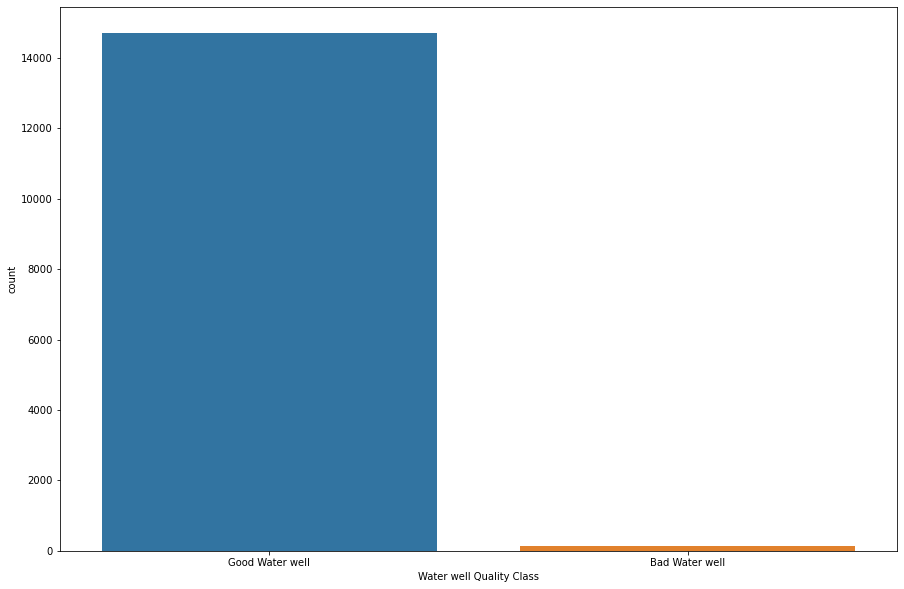

In [125]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water well Quality Class',data=df16)

In [132]:
category15 = []
for i in qualification15:
    if i == 'Bad Water well':category15.append(3)
    elif i == 'Good Water well':category15.append(1)
df16['Category'] = category15
df16

,Population,Water well Quality Class,Category
0,321,Good Water well,1
1,300,Good Water well,1
2,500,Good Water well,1
3,250,Good Water well,1
4,60,Good Water well,1
...,...,...,...
14845,20,Good Water well,1
14846,2960,Bad Water well,3
14847,200,Good Water well,1
14848,150,Good Water well,1


In [127]:
raw_info["public_meeting"].value_counts()

True     12738
False     1291
Name: public_meeting, dtype: int64

In [133]:
public_meetings = raw_info["public_meeting"].tolist()
public_meetings

[True,
 True,
 True,
 nan,
 nan,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 nan,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 nan,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 nan,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 nan,
 True,
 True,
 True,
 True,
 True,
 False,
 nan,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 nan,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [134]:
qualification16= []
for meetings in public_meetings:
    if  meetings == True :
        qualification16.append('Bad Water well')
    elif meetings == False :
        qualification16.append('Good Water well')
    else:
        qualification16.append('Unkown')
qualification16

['Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Unkown',
 'Unkown',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Good Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Good Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad Water well',
 'Bad W

In [135]:
df17 = pd.DataFrame({'Public Meetings Amount':public_meetings,'Water well Quality Class':qualification16})
df17

,Public Meetings Amount,Water well Quality Class
0,True,Bad Water well
1,True,Bad Water well
2,True,Bad Water well
3,NaN,Unkown
4,NaN,Unkown
...,...,...
14845,True,Bad Water well
14846,True,Bad Water well
14847,True,Bad Water well
14848,True,Bad Water well


<AxesSubplot:xlabel='Water well Quality Class', ylabel='count'>

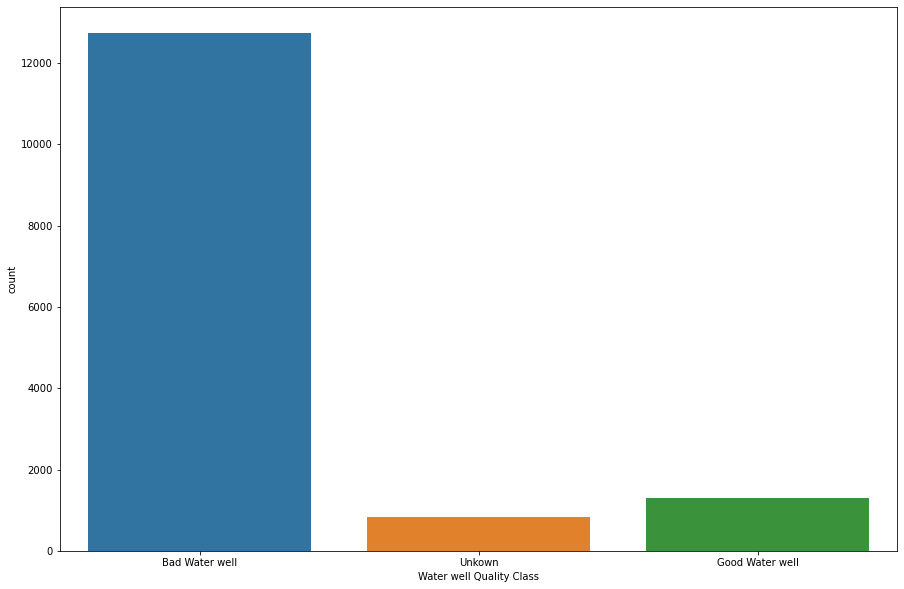

In [136]:
plt.figure(figsize=(15,10))
sns.countplot(x='Water well Quality Class',data=df17)

In [137]:
category16 = []
for i in qualification16:
    if i == 'Bad Water well':category16.append(3)
    elif i == 'Good Water well':category16.append(1)
    elif i == 'Unkown':category16.append(0)
df17['Category'] = category16
df17

,Public Meetings Amount,Water well Quality Class,Category
0,True,Bad Water well,3
1,True,Bad Water well,3
2,True,Bad Water well,3
3,NaN,Unkown,0
4,NaN,Unkown,0
...,...,...,...
14845,True,Bad Water well,3
14846,True,Bad Water well,3
14847,True,Bad Water well,3
14848,True,Bad Water well,3


In [133]:
raw_info["region"].value_counts()

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

In [138]:
regions = raw_info["region"].tolist()
regions

['Manyara',
 'Arusha',
 'Singida',
 'Lindi',
 'Ruvuma',
 'Arusha',
 'Iringa',
 'Mtwara',
 'Mtwara',
 'Kilimanjaro',
 'Kilimanjaro',
 'Manyara',
 'Tabora',
 'Mwanza',
 'Iringa',
 'Ruvuma',
 'Pwani',
 'Tanga',
 'Shinyanga',
 'Mtwara',
 'Dar es Salaam',
 'Iringa',
 'Kigoma',
 'Singida',
 'Shinyanga',
 'Iringa',
 'Ruvuma',
 'Dodoma',
 'Shinyanga',
 'Manyara',
 'Arusha',
 'Tabora',
 'Tabora',
 'Arusha',
 'Iringa',
 'Iringa',
 'Tanga',
 'Kilimanjaro',
 'Morogoro',
 'Mbeya',
 'Mtwara',
 'Tanga',
 'Shinyanga',
 'Mwanza',
 'Mwanza',
 'Mbeya',
 'Tabora',
 'Kilimanjaro',
 'Mbeya',
 'Shinyanga',
 'Mbeya',
 'Tanga',
 'Ruvuma',
 'Shinyanga',
 'Lindi',
 'Mwanza',
 'Mwanza',
 'Kilimanjaro',
 'Ruvuma',
 'Arusha',
 'Shinyanga',
 'Kagera',
 'Mara',
 'Singida',
 'Iringa',
 'Morogoro',
 'Arusha',
 'Kilimanjaro',
 'Mwanza',
 'Kilimanjaro',
 'Kigoma',
 'Ruvuma',
 'Mbeya',
 'Manyara',
 'Rukwa',
 'Shinyanga',
 'Tanga',
 'Kilimanjaro',
 'Dodoma',
 'Kilimanjaro',
 'Tabora',
 'Tanga',
 'Kagera',
 'Kagera',
 'Arus

In [139]:
qualification17= []
for region in regions:
    if  region == 'Shinyanga':
        qualification17.append('Bad Region')
    elif region == 'Iringa':
        qualification17.append('Bad Region')
    elif region == 'Mbeya':
        qualification17.append('Good Region')
    elif region == 'Kilimanjaro':
        qualification17.append('Intermediate Region')
    elif region == 'Morogoro':
        qualification17.append('Bad Region')
    elif region == 'Kagera':
        qualification17.append('Bad Region')
    elif region == 'Mwanza':
        qualification17.append('Bad Region')
    elif region == 'Arusha':
        qualification17.append('Good Region')
    elif region == 'Kigoma':
        qualification17.append('Good Region')
    elif region == 'Pwani':
        qualification17.append('Good Region')
    elif region == 'Ruvuma':
        qualification17.append('Intermediate Region')
    elif region == 'Tanga':
        qualification17.append('Bad Region')
    elif region == 'Dodoma':
        qualification17.append('Intermediate Region')
    elif region == 'Tabora':
        qualification17.append('Good Region')
    elif region == 'Mara':
        qualification17.append('Good Region')
    elif region == 'Singida':
        qualification17.append('Intermediate Region')
    elif region == 'Rukwa':
        qualification17.append('Intermediate Region')
    elif region == 'Mtwara':
        qualification17.append('Bad Region')
    elif region == 'Manyara':
        qualification17.append('Intermediate Region')
    elif region == 'Lindi':
        qualification17.append('Good Region')
    elif region == 'Dar es Salaam':
        qualification17.append('Bad Region')
qualification17

['Intermediate Region',
 'Good Region',
 'Intermediate Region',
 'Good Region',
 'Intermediate Region',
 'Good Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Intermediate Region',
 'Intermediate Region',
 'Intermediate Region',
 'Good Region',
 'Bad Region',
 'Bad Region',
 'Intermediate Region',
 'Good Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Good Region',
 'Intermediate Region',
 'Bad Region',
 'Bad Region',
 'Intermediate Region',
 'Intermediate Region',
 'Bad Region',
 'Intermediate Region',
 'Good Region',
 'Good Region',
 'Good Region',
 'Good Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Intermediate Region',
 'Bad Region',
 'Good Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Bad Region',
 'Good Region',
 'Good Region',
 'Intermediate Region',
 'Good Region',
 'Bad Region',
 'Good Region',
 'Bad Region',
 'Intermediate Region',
 'Bad Region',
 'Good Region',
 'Bad Region',
 'Bad Region',
 'I

In [140]:
df18 = pd.DataFrame({'Region':regions,'Region Quality Class':qualification17})
df18

,Region,Region Quality Class
0,Manyara,Intermediate Region
1,Arusha,Good Region
2,Singida,Intermediate Region
3,Lindi,Good Region
4,Ruvuma,Intermediate Region
...,...,...
14845,Pwani,Good Region
14846,Tanga,Bad Region
14847,Singida,Intermediate Region
14848,Ruvuma,Intermediate Region


<AxesSubplot:xlabel='Region Quality Class', ylabel='count'>

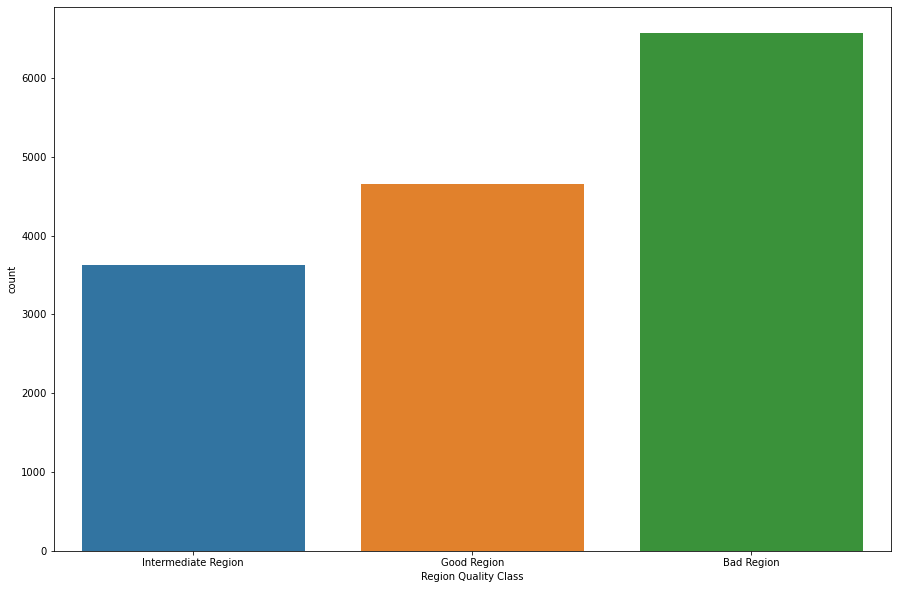

In [141]:
plt.figure(figsize=(15,10))
sns.countplot(x='Region Quality Class',data=df18)

In [142]:
category17 = []
for i in qualification17:
    if i == 'Bad Region':category17.append(3)
    elif i == 'Good Region':category17.append(1)
    elif i == 'Intermediate Region':category17.append(2)
df18['Category'] = category17
df18

,Region,Region Quality Class,Category
0,Manyara,Intermediate Region,2
1,Arusha,Good Region,1
2,Singida,Intermediate Region,2
3,Lindi,Good Region,1
4,Ruvuma,Intermediate Region,2
...,...,...,...
14845,Pwani,Good Region,1
14846,Tanga,Bad Region,3
14847,Singida,Intermediate Region,2
14848,Ruvuma,Intermediate Region,2


In [440]:
new = []
for i in qualification1:
    new.append("{:<40}".format(i))

In [441]:
new

['Bad Altitude: Over 1500 Feet            ',
 'Bad Altitude: Over 1500 Feet            ',
 'Bad Altitude: Over 1500 Feet            ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Bad Altitude: Over 1500 Feet            ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Good Altitude: (-500)-0 Feet            ',
 'Good Altitude: (-500)-0 Feet            ',
 'Bad Altitude: Over 1500 Feet            ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Good Altitude: (-500)-0 Feet            ',
 'Bad Altitude: Over 1500 Feet            ',
 'Good Altitude: (-500)-0 Feet            ',
 'Intermediate Altitude: 1-1499 Feet      ',
 'Good Altitude: (-500)-0 Feet            ',
 'Bad Altitude: Over 1500 Feet            ',
 'Intermed

In [437]:
z

'Altitude       '

In [524]:
z = 'Altitude'
z = "{:<40}".format(z)
tz_well_info = pd.DataFrame({'Name':place1,'Type':place2,'Zone':place3,
                            'Static_Head':qualification,'Altitude':new,
                            'Quality_of_Water':qualification2,'Quantity_of_Water':qualification3,
                            'Source':qualification4,'Source_Quality':qualification5,
                            'Source_Class_Quality':qualification6,
                            'Waterpiont':qualification7, 'Basin':qualification8, 
                             'Density':qualification9,
                            'Water_Extraction':qualification10, 'Management':qualification11,
                            'Construction_Year_Class':qualification12,
                            'Permit_Class':qualification13,'Water_Quality_Class':qualification14,
                            'Water_Well_Quality_Class1':qualification15,
                            'Water_Well_Quality_Class2':qualification16, 
                            'Region_Quality_Class':qualification17})

In [526]:
tz_well_info.loc[len(tz_well_info.index)] = ['..............................................',
                                             '',
                                             '.......................................................',
                    '............................................................................',
                     '..........................................................................',
                                             '..........................',
                     '....................................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                    '....................................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             '.......................................................',
                                             
] 

In [527]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('max_colwidth', 60)
tz_well_info

,Name,Type,Zone,Static_Head,Altitude,Quality_of_Water,Quantity_of_Water,Source,Source_Quality,Source_Class_Quality,Waterpiont,Basin,Density,Water_Extraction,Management,Construction_Year_Class,Permit_Class,Water_Quality_Class,Water_Well_Quality_Class1,Water_Well_Quality_Class2,Region_Quality_Class
0,Manyara,state,Northern Zone,Bad Static Head: 0-59 or over 189,Bad Altitude: Over 1500 Feet,Good Water,Intermediate Quantity of Water,Bad Source,Bad Source,Bad Source,Unknown Waterpiont,Bad Basin,Low Density,Unknown,Bad Management,Good Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
1,Olmotonyi Ward,village,Northern Zone,Bad Static Head: 0-59 or over 189,Bad Altitude: Over 1500 Feet,Good Water,Intermediate Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Intermediate Basin,Intermediate Density,Good Water Extraction,Good Management,Intermediate Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Good Region
2,Puma,twon,Central Zone,Bad Static Head: 0-59 or over 189,Bad Altitude: Over 1500 Feet,Good Water,Intermediate Quantity of Water,Bad Source,Bad Source,Bad Source,Unknown Waterpiont,Bad Basin,Low Density,Unknown,Good Management,Good Construction Year,Unkown,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
3,Mkutano,village,Coastal Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Good Water,Bad Quantity of Water,Good Source,Good Source,Intermediate Source,Unknown Waterpiont,Bad Basin,Low Density,Unknown,Good Management,Bad Construction Year,Good,Unkown,Good Water well,Unkown,Good Region
4,Lusonga,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Good Water,Good Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Bad Basin,Low Density,Good Water Extraction,Good Management,Intermediate Construction Year,Good,Good Water Quality,Good Water well,Unkown,Intermediate Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14846,Elerai,village,Northern Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Bad Water,Intermediate Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Intermediate Basin,Intermediate Density,Intermediate Water Basin,Good Management,Intermediate Construction Year,Bad,Good Water Quality,Bad Water well,Bad Water well,Bad Region
14847,Ughandi B,village,Central Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Bad Source,Bad Source,Bad Source,Good Waterpiont,Bad Basin,Low Density,Good Water Extraction,Good Management,Good Construction Year,Unkown,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
14848,Magazini,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Intermediate Source,Bad Source,Bad Source,Good Waterpiont,Good Basin,Low Density,Good Water Extraction,Good Management,Good Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region
14849,Mbuyula,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Bad Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Good Basin,Low Density,Good Water Extraction,Good Management,Good Construction Year,Good,Bad Water Quality,Good Water well,Bad Water well,Intermediate Region


In [535]:
tz_well_info[-60:]

,Name,Type,Zone,Static_Head,Altitude,Quality_of_Water,Quantity_of_Water,Source,Source_Quality,Source_Class_Quality,Waterpiont,Basin,Density,Water_Extraction,Management,Construction_Year_Class,Permit_Class,Water_Quality_Class,Water_Well_Quality_Class1,Water_Well_Quality_Class2,Region_Quality_Class
14791,Tabora,state,Central Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Bad Water,Bad Quantity of Water,Good Source,Good Source,Intermediate Source,Unknown Waterpiont,Good Basin,Low Density,Unknown,Good Management,Unkown Year,Good,Bad Water Quality,Good Water well,Bad Water well,Good Region
14792,Lyangwene,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Bad Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Bad Basin,Low Density,Intermediate Water Basin,Good Management,Intermediate Construction Year,Good,Good Water Quality,Good Water well,Bad Water well,Intermediate Region
14793,Tingatinga,village,Northern Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Intermediate Source,Bad Source,Bad Source,Good Waterpiont,Bad Basin,Intermediate Density,Good Water Extraction,Good Management,Bad Construction Year,Good,Good Water Quality,Good Water well,Bad Water well,Good Region
14794,Tandahimba,village,Coastal Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Good Source,Intermediate Source,Intermediate Source,Good Waterpiont,Bad Basin,Intermediate Density,Good Water Extraction,Good Management,Intermediate Construction Year,Good,Good Water Quality,Good Water well,Bad Water well,Bad Region
14795,Mapogolo,village,Southern Highlands Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Bad Water,Intermediate Quantity of Water,Intermediate Source,Bad Source,Bad Source,Good Waterpiont,Bad Basin,Intermediate Density,Good Water Extraction,Good Management,Unkown Year,Bad,Bad Water Quality,Good Water well,Bad Water well,Good Region
14796,Somanda,village,Lake Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Bad Water,Good Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Bad Basin,Intermediate Density,Intermediate Water Basin,Good Management,Unkown Year,Bad,Bad Water Quality,Good Water well,Bad Water well,Bad Region
14797,Masaika,village,Northern Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Intermediate Quantity of Water,Good Source,Good Source,Intermediate Source,Unknown Waterpiont,Intermediate Basin,Intermediate Density,Unknown,Good Management,Bad Construction Year,Bad,Bad Water Quality,Good Water well,Bad Water well,Bad Region
14798,Kanshenshero Village,village,Lake Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Bad Water,Good Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Bad Basin,Intermediate Density,Intermediate Water Basin,Good Management,Unkown Year,Good,Bad Water Quality,Good Water well,Bad Water well,Bad Region
14799,Mwaseni,village,Coastal Zone,Bad Static Head: 0-59 or over 189,Intermediate Altitude: 1-1499 Feet,Bad Water,Good Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Bad Basin,Low Density,Intermediate Water Basin,Good Management,Good Construction Year,Good,Good Water Quality,Good Water well,Bad Water well,Good Region
14800,Tabora,state,Central Zone,Bad Static Head: 0-59 or over 189,Good Altitude: (-500)-0 Feet,Good Water,Good Quantity of Water,Good Source,Good Source,Intermediate Source,Good Waterpiont,Good Basin,Low Density,Intermediate Water Basin,Good Management,Unkown Year,Good,Bad Water Quality,Good Water well,Bad Water well,Good Region
